In [1]:
import torch
from torchvision import models, datasets,transforms
from torch.utils.data import DataLoader
from torch import nn
from torch import optim
import torch.nn.functional as F

In [2]:
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

In [3]:
train_dir = './Data/Train'
test_dir = './Data/Test/'

In [4]:
bs = 16
train_data = datasets.ImageFolder(root = train_dir,transform=train_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=test_transform)

print(len(train_data),len(test_data))


train_data_loader = DataLoader(train_data,batch_size=bs,shuffle=True)
test_data_loader = DataLoader(test_data,batch_size=bs, shuffle=False)

10232 280


In [5]:
train_data_loader.dataset.classes

['0', '180', '270', '90']

In [6]:
torch.cuda.empty_cache()

In [7]:
torch.cuda.is_available()

True

In [9]:
resnet50 = models.resnet50(pretrained=True)

In [10]:
for param in resnet50.parameters():
    param.require_grad = True

In [11]:
resnet50.fc = nn.Sequential(
    nn.Linear(2048,256),
    nn.ReLU(),
    nn.Dropout(0.6),
    nn.Linear(256, 4),
    nn.LogSoftmax(dim=1)    

)

In [9]:
device = 'cpu'
model = resnet50

NameError: name 'resnet50' is not defined

In [16]:
model = model.to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters())

In [17]:
epochs = 30
training_loss = []
testing_loss = []
accuracy_list = []
for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch+1,epochs))
    model.train()
    
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0
    

    
    for i , (inputs,labels) in enumerate(train_data_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        output = model(inputs)
        loss = loss_func(output,labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*inputs.size(0)
#         writer.add_scalar('loss', loss, epoch)
        print("Batch number: {:03d}, Training_Loss: {:.4f},".format(i, loss.item()))


    with torch.no_grad():
        model.eval()
        num_correct = 0
        num_examples = 0
        

        for j , (inputs, target) in enumerate(test_data_loader):
            inputs = inputs.to(device)
            target = target.to(device)

            output = model(inputs)
            loss = loss_func(output, target)
            correct = torch.eq(torch.max(torch.functional.F.softmax(output), dim=1)[1], target).view(-1)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
            test_loss += loss.item()*inputs.size(0)
            print("Test Batch number: {:03d}, Test_Loss: {:.4f}, Accuracy:{:.2f}".format(j, loss.item(),num_correct/num_examples))
#             writer.add_scalar('accuracy', num_correct / num_examples, epoch)
#             writer.add_scalar('Test_loss', loss, epoch)
#             test_acc += num_correct

        
        
        
        
    avg_train_loss = train_loss/len(train_data)
    avg_test_loss = test_loss/len(test_data)
    avg_acc = num_correct/len(test_data)
    training_loss.append(avg_train_loss)
    testing_loss.append(avg_test_loss)
    accuracy_list.append(avg_acc)
    

        
        

Epoch: 1/30
Batch number: 000, Training_Loss: 1.4054,
Batch number: 001, Training_Loss: 1.4666,
Batch number: 002, Training_Loss: 1.2632,
Batch number: 003, Training_Loss: 1.5541,
Batch number: 004, Training_Loss: 1.3297,
Batch number: 005, Training_Loss: 1.2863,
Batch number: 006, Training_Loss: 0.9773,
Batch number: 007, Training_Loss: 1.2967,
Batch number: 008, Training_Loss: 1.5524,
Batch number: 009, Training_Loss: 1.1214,
Batch number: 010, Training_Loss: 1.7607,
Batch number: 011, Training_Loss: 1.2215,
Batch number: 012, Training_Loss: 0.7661,
Batch number: 013, Training_Loss: 0.9605,
Batch number: 014, Training_Loss: 1.3901,
Batch number: 015, Training_Loss: 0.8867,
Batch number: 016, Training_Loss: 1.2671,
Batch number: 017, Training_Loss: 1.4254,
Batch number: 018, Training_Loss: 0.8163,
Batch number: 019, Training_Loss: 0.9535,
Batch number: 020, Training_Loss: 1.2793,
Batch number: 021, Training_Loss: 0.9191,
Batch number: 022, Training_Loss: 1.7339,
Batch number: 023, Tra

Batch number: 195, Training_Loss: 1.4079,
Batch number: 196, Training_Loss: 0.9797,
Batch number: 197, Training_Loss: 0.8109,
Batch number: 198, Training_Loss: 0.7111,
Batch number: 199, Training_Loss: 0.9141,
Batch number: 200, Training_Loss: 0.7423,
Batch number: 201, Training_Loss: 0.7242,
Batch number: 202, Training_Loss: 0.8001,
Batch number: 203, Training_Loss: 0.9339,
Batch number: 204, Training_Loss: 0.9207,
Batch number: 205, Training_Loss: 0.6982,
Batch number: 206, Training_Loss: 0.6575,
Batch number: 207, Training_Loss: 0.7968,
Batch number: 208, Training_Loss: 0.7951,
Batch number: 209, Training_Loss: 0.7860,
Batch number: 210, Training_Loss: 0.9459,
Batch number: 211, Training_Loss: 0.6847,
Batch number: 212, Training_Loss: 0.8732,
Batch number: 213, Training_Loss: 0.5877,
Batch number: 214, Training_Loss: 0.9181,
Batch number: 215, Training_Loss: 0.9871,
Batch number: 216, Training_Loss: 0.7753,
Batch number: 217, Training_Loss: 0.8223,
Batch number: 218, Training_Loss: 

Batch number: 391, Training_Loss: 0.8747,
Batch number: 392, Training_Loss: 0.8064,
Batch number: 393, Training_Loss: 0.7410,
Batch number: 394, Training_Loss: 0.7974,
Batch number: 395, Training_Loss: 0.5967,
Batch number: 396, Training_Loss: 0.9380,
Batch number: 397, Training_Loss: 0.8258,
Batch number: 398, Training_Loss: 0.6956,
Batch number: 399, Training_Loss: 0.6168,
Batch number: 400, Training_Loss: 0.6886,
Batch number: 401, Training_Loss: 1.1896,
Batch number: 402, Training_Loss: 0.6290,
Batch number: 403, Training_Loss: 0.6223,
Batch number: 404, Training_Loss: 0.9315,
Batch number: 405, Training_Loss: 0.6189,
Batch number: 406, Training_Loss: 0.6365,
Batch number: 407, Training_Loss: 0.5857,
Batch number: 408, Training_Loss: 0.5976,
Batch number: 409, Training_Loss: 0.5657,
Batch number: 410, Training_Loss: 0.6224,
Batch number: 411, Training_Loss: 0.6251,
Batch number: 412, Training_Loss: 0.8071,
Batch number: 413, Training_Loss: 0.8435,
Batch number: 414, Training_Loss: 

Batch number: 587, Training_Loss: 0.7816,
Batch number: 588, Training_Loss: 0.7001,
Batch number: 589, Training_Loss: 0.9619,
Batch number: 590, Training_Loss: 0.6239,
Batch number: 591, Training_Loss: 0.6547,
Batch number: 592, Training_Loss: 0.9605,
Batch number: 593, Training_Loss: 0.7180,
Batch number: 594, Training_Loss: 0.7028,
Batch number: 595, Training_Loss: 0.7067,
Batch number: 596, Training_Loss: 0.7395,
Batch number: 597, Training_Loss: 0.7746,
Batch number: 598, Training_Loss: 0.7344,
Batch number: 599, Training_Loss: 0.8168,
Batch number: 600, Training_Loss: 0.7696,
Batch number: 601, Training_Loss: 0.5859,
Batch number: 602, Training_Loss: 1.2507,
Batch number: 603, Training_Loss: 0.6467,
Batch number: 604, Training_Loss: 0.6812,
Batch number: 605, Training_Loss: 0.6458,
Batch number: 606, Training_Loss: 0.6370,
Batch number: 607, Training_Loss: 0.7122,
Batch number: 608, Training_Loss: 0.5894,
Batch number: 609, Training_Loss: 0.6661,
Batch number: 610, Training_Loss: 

C:\Users\Akansh Maurya\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test Batch number: 000, Test_Loss: 0.1240, Accuracy:1.00
Test Batch number: 001, Test_Loss: 0.1473, Accuracy:1.00
Test Batch number: 002, Test_Loss: 0.1827, Accuracy:1.00
Test Batch number: 003, Test_Loss: 0.0639, Accuracy:1.00
Test Batch number: 004, Test_Loss: 0.5606, Accuracy:0.94
Test Batch number: 005, Test_Loss: 1.4905, Accuracy:0.83
Test Batch number: 006, Test_Loss: 1.4997, Accuracy:0.74
Test Batch number: 007, Test_Loss: 0.8699, Accuracy:0.73
Test Batch number: 008, Test_Loss: 0.8149, Accuracy:0.74
Test Batch number: 009, Test_Loss: 0.5611, Accuracy:0.76
Test Batch number: 010, Test_Loss: 0.5218, Accuracy:0.78
Test Batch number: 011, Test_Loss: 0.6032, Accuracy:0.80
Test Batch number: 012, Test_Loss: 0.5789, Accuracy:0.81
Test Batch number: 013, Test_Loss: 0.7902, Accuracy:0.77
Test Batch number: 014, Test_Loss: 0.8291, Accuracy:0.73
Test Batch number: 015, Test_Loss: 0.8313, Accuracy:0.69
Test Batch number: 016, Test_Loss: 0.8454, Accuracy:0.66
Test Batch number: 017, Test_Lo

Batch number: 171, Training_Loss: 1.0605,
Batch number: 172, Training_Loss: 0.7287,
Batch number: 173, Training_Loss: 1.4951,
Batch number: 174, Training_Loss: 0.5177,
Batch number: 175, Training_Loss: 0.5317,
Batch number: 176, Training_Loss: 1.0284,
Batch number: 177, Training_Loss: 0.5294,
Batch number: 178, Training_Loss: 0.4437,
Batch number: 179, Training_Loss: 0.4320,
Batch number: 180, Training_Loss: 0.4351,
Batch number: 181, Training_Loss: 0.5043,
Batch number: 182, Training_Loss: 0.7975,
Batch number: 183, Training_Loss: 1.0709,
Batch number: 184, Training_Loss: 0.6843,
Batch number: 185, Training_Loss: 0.7943,
Batch number: 186, Training_Loss: 0.8329,
Batch number: 187, Training_Loss: 0.8307,
Batch number: 188, Training_Loss: 0.6557,
Batch number: 189, Training_Loss: 0.4919,
Batch number: 190, Training_Loss: 0.5769,
Batch number: 191, Training_Loss: 0.7204,
Batch number: 192, Training_Loss: 0.5081,
Batch number: 193, Training_Loss: 0.4375,
Batch number: 194, Training_Loss: 

Batch number: 367, Training_Loss: 1.0952,
Batch number: 368, Training_Loss: 0.5165,
Batch number: 369, Training_Loss: 0.3381,
Batch number: 370, Training_Loss: 0.5103,
Batch number: 371, Training_Loss: 0.5626,
Batch number: 372, Training_Loss: 0.2794,
Batch number: 373, Training_Loss: 1.4873,
Batch number: 374, Training_Loss: 0.6565,
Batch number: 375, Training_Loss: 0.4514,
Batch number: 376, Training_Loss: 0.4089,
Batch number: 377, Training_Loss: 0.3332,
Batch number: 378, Training_Loss: 0.6615,
Batch number: 379, Training_Loss: 0.4058,
Batch number: 380, Training_Loss: 0.6506,
Batch number: 381, Training_Loss: 0.4609,
Batch number: 382, Training_Loss: 0.2665,
Batch number: 383, Training_Loss: 0.4183,
Batch number: 384, Training_Loss: 0.3582,
Batch number: 385, Training_Loss: 0.2308,
Batch number: 386, Training_Loss: 1.0765,
Batch number: 387, Training_Loss: 0.4408,
Batch number: 388, Training_Loss: 0.2796,
Batch number: 389, Training_Loss: 0.2489,
Batch number: 390, Training_Loss: 

Batch number: 563, Training_Loss: 0.5262,
Batch number: 564, Training_Loss: 0.2402,
Batch number: 565, Training_Loss: 0.5018,
Batch number: 566, Training_Loss: 0.1496,
Batch number: 567, Training_Loss: 0.1868,
Batch number: 568, Training_Loss: 0.5076,
Batch number: 569, Training_Loss: 0.2887,
Batch number: 570, Training_Loss: 0.5224,
Batch number: 571, Training_Loss: 0.4194,
Batch number: 572, Training_Loss: 0.2830,
Batch number: 573, Training_Loss: 0.1274,
Batch number: 574, Training_Loss: 0.5993,
Batch number: 575, Training_Loss: 0.2402,
Batch number: 576, Training_Loss: 1.6399,
Batch number: 577, Training_Loss: 0.3841,
Batch number: 578, Training_Loss: 0.6152,
Batch number: 579, Training_Loss: 0.7189,
Batch number: 580, Training_Loss: 0.3346,
Batch number: 581, Training_Loss: 0.6256,
Batch number: 582, Training_Loss: 0.8153,
Batch number: 583, Training_Loss: 0.2158,
Batch number: 584, Training_Loss: 0.5028,
Batch number: 585, Training_Loss: 0.3630,
Batch number: 586, Training_Loss: 

Batch number: 094, Training_Loss: 0.3554,
Batch number: 095, Training_Loss: 0.5815,
Batch number: 096, Training_Loss: 0.5498,
Batch number: 097, Training_Loss: 0.2579,
Batch number: 098, Training_Loss: 0.2957,
Batch number: 099, Training_Loss: 0.4580,
Batch number: 100, Training_Loss: 0.5103,
Batch number: 101, Training_Loss: 0.4128,
Batch number: 102, Training_Loss: 0.2800,
Batch number: 103, Training_Loss: 0.0378,
Batch number: 104, Training_Loss: 0.5495,
Batch number: 105, Training_Loss: 0.2437,
Batch number: 106, Training_Loss: 0.4218,
Batch number: 107, Training_Loss: 0.3233,
Batch number: 108, Training_Loss: 0.1224,
Batch number: 109, Training_Loss: 0.9994,
Batch number: 110, Training_Loss: 0.2518,
Batch number: 111, Training_Loss: 0.2094,
Batch number: 112, Training_Loss: 0.4129,
Batch number: 113, Training_Loss: 1.2391,
Batch number: 114, Training_Loss: 0.2360,
Batch number: 115, Training_Loss: 0.1377,
Batch number: 116, Training_Loss: 0.2779,
Batch number: 117, Training_Loss: 

Batch number: 290, Training_Loss: 0.2958,
Batch number: 291, Training_Loss: 0.5194,
Batch number: 292, Training_Loss: 0.2963,
Batch number: 293, Training_Loss: 0.3111,
Batch number: 294, Training_Loss: 0.1107,
Batch number: 295, Training_Loss: 0.7104,
Batch number: 296, Training_Loss: 0.1733,
Batch number: 297, Training_Loss: 0.2380,
Batch number: 298, Training_Loss: 0.4131,
Batch number: 299, Training_Loss: 0.7930,
Batch number: 300, Training_Loss: 0.2624,
Batch number: 301, Training_Loss: 0.1057,
Batch number: 302, Training_Loss: 0.2722,
Batch number: 303, Training_Loss: 0.4264,
Batch number: 304, Training_Loss: 0.2633,
Batch number: 305, Training_Loss: 0.0935,
Batch number: 306, Training_Loss: 0.1949,
Batch number: 307, Training_Loss: 0.2587,
Batch number: 308, Training_Loss: 0.1152,
Batch number: 309, Training_Loss: 0.1529,
Batch number: 310, Training_Loss: 0.0725,
Batch number: 311, Training_Loss: 0.3463,
Batch number: 312, Training_Loss: 0.2552,
Batch number: 313, Training_Loss: 

Batch number: 486, Training_Loss: 0.5400,
Batch number: 487, Training_Loss: 0.1778,
Batch number: 488, Training_Loss: 0.2837,
Batch number: 489, Training_Loss: 0.3620,
Batch number: 490, Training_Loss: 0.1469,
Batch number: 491, Training_Loss: 0.0660,
Batch number: 492, Training_Loss: 0.1526,
Batch number: 493, Training_Loss: 0.1797,
Batch number: 494, Training_Loss: 1.0867,
Batch number: 495, Training_Loss: 0.1429,
Batch number: 496, Training_Loss: 0.2094,
Batch number: 497, Training_Loss: 0.9259,
Batch number: 498, Training_Loss: 0.3261,
Batch number: 499, Training_Loss: 0.2189,
Batch number: 500, Training_Loss: 1.0459,
Batch number: 501, Training_Loss: 0.1646,
Batch number: 502, Training_Loss: 0.1108,
Batch number: 503, Training_Loss: 0.1868,
Batch number: 504, Training_Loss: 0.1242,
Batch number: 505, Training_Loss: 0.2686,
Batch number: 506, Training_Loss: 0.3342,
Batch number: 507, Training_Loss: 0.4214,
Batch number: 508, Training_Loss: 0.2861,
Batch number: 509, Training_Loss: 

Batch number: 017, Training_Loss: 0.2151,
Batch number: 018, Training_Loss: 0.2483,
Batch number: 019, Training_Loss: 0.1488,
Batch number: 020, Training_Loss: 0.3644,
Batch number: 021, Training_Loss: 0.9817,
Batch number: 022, Training_Loss: 0.3035,
Batch number: 023, Training_Loss: 0.2116,
Batch number: 024, Training_Loss: 0.4568,
Batch number: 025, Training_Loss: 0.2911,
Batch number: 026, Training_Loss: 0.1052,
Batch number: 027, Training_Loss: 0.5131,
Batch number: 028, Training_Loss: 0.4359,
Batch number: 029, Training_Loss: 0.4327,
Batch number: 030, Training_Loss: 0.1075,
Batch number: 031, Training_Loss: 0.4940,
Batch number: 032, Training_Loss: 0.2335,
Batch number: 033, Training_Loss: 1.2589,
Batch number: 034, Training_Loss: 0.5211,
Batch number: 035, Training_Loss: 0.5340,
Batch number: 036, Training_Loss: 0.1280,
Batch number: 037, Training_Loss: 0.2091,
Batch number: 038, Training_Loss: 0.3695,
Batch number: 039, Training_Loss: 0.1259,
Batch number: 040, Training_Loss: 

Batch number: 213, Training_Loss: 0.3687,
Batch number: 214, Training_Loss: 0.2376,
Batch number: 215, Training_Loss: 0.3969,
Batch number: 216, Training_Loss: 0.3228,
Batch number: 217, Training_Loss: 0.4889,
Batch number: 218, Training_Loss: 0.1136,
Batch number: 219, Training_Loss: 0.2611,
Batch number: 220, Training_Loss: 0.6539,
Batch number: 221, Training_Loss: 0.3563,
Batch number: 222, Training_Loss: 0.8036,
Batch number: 223, Training_Loss: 0.6097,
Batch number: 224, Training_Loss: 0.3530,
Batch number: 225, Training_Loss: 0.1979,
Batch number: 226, Training_Loss: 0.1725,
Batch number: 227, Training_Loss: 0.1687,
Batch number: 228, Training_Loss: 0.1328,
Batch number: 229, Training_Loss: 0.3620,
Batch number: 230, Training_Loss: 0.2702,
Batch number: 231, Training_Loss: 0.0857,
Batch number: 232, Training_Loss: 0.1331,
Batch number: 233, Training_Loss: 0.2904,
Batch number: 234, Training_Loss: 0.5366,
Batch number: 235, Training_Loss: 0.2903,
Batch number: 236, Training_Loss: 

Batch number: 409, Training_Loss: 0.2997,
Batch number: 410, Training_Loss: 0.2724,
Batch number: 411, Training_Loss: 0.0806,
Batch number: 412, Training_Loss: 0.2746,
Batch number: 413, Training_Loss: 0.1428,
Batch number: 414, Training_Loss: 0.1497,
Batch number: 415, Training_Loss: 0.2274,
Batch number: 416, Training_Loss: 0.2363,
Batch number: 417, Training_Loss: 0.4183,
Batch number: 418, Training_Loss: 0.1018,
Batch number: 419, Training_Loss: 0.1588,
Batch number: 420, Training_Loss: 0.2551,
Batch number: 421, Training_Loss: 0.0323,
Batch number: 422, Training_Loss: 0.1865,
Batch number: 423, Training_Loss: 0.1410,
Batch number: 424, Training_Loss: 0.1611,
Batch number: 425, Training_Loss: 0.4836,
Batch number: 426, Training_Loss: 0.8418,
Batch number: 427, Training_Loss: 0.0417,
Batch number: 428, Training_Loss: 0.3215,
Batch number: 429, Training_Loss: 0.1048,
Batch number: 430, Training_Loss: 0.8031,
Batch number: 431, Training_Loss: 0.5107,
Batch number: 432, Training_Loss: 

Batch number: 605, Training_Loss: 0.0556,
Batch number: 606, Training_Loss: 0.2179,
Batch number: 607, Training_Loss: 0.1260,
Batch number: 608, Training_Loss: 0.0449,
Batch number: 609, Training_Loss: 0.3988,
Batch number: 610, Training_Loss: 0.3789,
Batch number: 611, Training_Loss: 0.6439,
Batch number: 612, Training_Loss: 0.1384,
Batch number: 613, Training_Loss: 0.4949,
Batch number: 614, Training_Loss: 0.1677,
Batch number: 615, Training_Loss: 0.7852,
Batch number: 616, Training_Loss: 0.1414,
Batch number: 617, Training_Loss: 0.3698,
Batch number: 618, Training_Loss: 0.1222,
Batch number: 619, Training_Loss: 0.0329,
Batch number: 620, Training_Loss: 0.5756,
Batch number: 621, Training_Loss: 0.0496,
Batch number: 622, Training_Loss: 0.3639,
Batch number: 623, Training_Loss: 0.2134,
Batch number: 624, Training_Loss: 0.0345,
Batch number: 625, Training_Loss: 0.1706,
Batch number: 626, Training_Loss: 0.4105,
Batch number: 627, Training_Loss: 0.2327,
Batch number: 628, Training_Loss: 

Batch number: 136, Training_Loss: 0.1048,
Batch number: 137, Training_Loss: 0.2896,
Batch number: 138, Training_Loss: 0.1444,
Batch number: 139, Training_Loss: 0.2351,
Batch number: 140, Training_Loss: 0.2327,
Batch number: 141, Training_Loss: 0.3923,
Batch number: 142, Training_Loss: 0.7559,
Batch number: 143, Training_Loss: 0.1309,
Batch number: 144, Training_Loss: 0.1940,
Batch number: 145, Training_Loss: 0.9825,
Batch number: 146, Training_Loss: 0.5426,
Batch number: 147, Training_Loss: 0.3604,
Batch number: 148, Training_Loss: 0.1744,
Batch number: 149, Training_Loss: 0.1238,
Batch number: 150, Training_Loss: 0.3354,
Batch number: 151, Training_Loss: 0.2520,
Batch number: 152, Training_Loss: 0.1464,
Batch number: 153, Training_Loss: 0.6274,
Batch number: 154, Training_Loss: 0.0942,
Batch number: 155, Training_Loss: 0.6312,
Batch number: 156, Training_Loss: 0.4829,
Batch number: 157, Training_Loss: 0.2057,
Batch number: 158, Training_Loss: 0.1174,
Batch number: 159, Training_Loss: 

Batch number: 332, Training_Loss: 0.4055,
Batch number: 333, Training_Loss: 0.2090,
Batch number: 334, Training_Loss: 0.8002,
Batch number: 335, Training_Loss: 0.6502,
Batch number: 336, Training_Loss: 0.0707,
Batch number: 337, Training_Loss: 0.2155,
Batch number: 338, Training_Loss: 0.4342,
Batch number: 339, Training_Loss: 0.0863,
Batch number: 340, Training_Loss: 0.2776,
Batch number: 341, Training_Loss: 0.0501,
Batch number: 342, Training_Loss: 0.3267,
Batch number: 343, Training_Loss: 0.3114,
Batch number: 344, Training_Loss: 0.2944,
Batch number: 345, Training_Loss: 0.1430,
Batch number: 346, Training_Loss: 0.1843,
Batch number: 347, Training_Loss: 0.1026,
Batch number: 348, Training_Loss: 0.1578,
Batch number: 349, Training_Loss: 0.0739,
Batch number: 350, Training_Loss: 0.3872,
Batch number: 351, Training_Loss: 0.1673,
Batch number: 352, Training_Loss: 0.2143,
Batch number: 353, Training_Loss: 0.1756,
Batch number: 354, Training_Loss: 0.0628,
Batch number: 355, Training_Loss: 

Batch number: 528, Training_Loss: 0.4789,
Batch number: 529, Training_Loss: 0.0492,
Batch number: 530, Training_Loss: 0.1578,
Batch number: 531, Training_Loss: 0.1009,
Batch number: 532, Training_Loss: 0.1066,
Batch number: 533, Training_Loss: 0.2871,
Batch number: 534, Training_Loss: 0.2242,
Batch number: 535, Training_Loss: 0.0355,
Batch number: 536, Training_Loss: 0.4771,
Batch number: 537, Training_Loss: 0.4866,
Batch number: 538, Training_Loss: 0.2104,
Batch number: 539, Training_Loss: 0.1028,
Batch number: 540, Training_Loss: 0.1531,
Batch number: 541, Training_Loss: 0.2124,
Batch number: 542, Training_Loss: 0.1246,
Batch number: 543, Training_Loss: 0.1137,
Batch number: 544, Training_Loss: 0.5280,
Batch number: 545, Training_Loss: 0.2670,
Batch number: 546, Training_Loss: 0.0825,
Batch number: 547, Training_Loss: 0.1351,
Batch number: 548, Training_Loss: 0.1713,
Batch number: 549, Training_Loss: 0.2754,
Batch number: 550, Training_Loss: 0.0858,
Batch number: 551, Training_Loss: 

Batch number: 059, Training_Loss: 0.5934,
Batch number: 060, Training_Loss: 0.0471,
Batch number: 061, Training_Loss: 0.1377,
Batch number: 062, Training_Loss: 0.0493,
Batch number: 063, Training_Loss: 0.1512,
Batch number: 064, Training_Loss: 0.1483,
Batch number: 065, Training_Loss: 0.1921,
Batch number: 066, Training_Loss: 0.0799,
Batch number: 067, Training_Loss: 0.0329,
Batch number: 068, Training_Loss: 0.0416,
Batch number: 069, Training_Loss: 0.1703,
Batch number: 070, Training_Loss: 0.1757,
Batch number: 071, Training_Loss: 0.1635,
Batch number: 072, Training_Loss: 0.7515,
Batch number: 073, Training_Loss: 0.1548,
Batch number: 074, Training_Loss: 0.3126,
Batch number: 075, Training_Loss: 0.2194,
Batch number: 076, Training_Loss: 0.0314,
Batch number: 077, Training_Loss: 0.1108,
Batch number: 078, Training_Loss: 0.2611,
Batch number: 079, Training_Loss: 0.8180,
Batch number: 080, Training_Loss: 0.7491,
Batch number: 081, Training_Loss: 0.0882,
Batch number: 082, Training_Loss: 

Batch number: 255, Training_Loss: 0.0645,
Batch number: 256, Training_Loss: 0.2641,
Batch number: 257, Training_Loss: 0.0836,
Batch number: 258, Training_Loss: 0.0227,
Batch number: 259, Training_Loss: 0.1867,
Batch number: 260, Training_Loss: 0.2866,
Batch number: 261, Training_Loss: 0.3481,
Batch number: 262, Training_Loss: 0.0561,
Batch number: 263, Training_Loss: 0.0800,
Batch number: 264, Training_Loss: 0.7771,
Batch number: 265, Training_Loss: 0.1365,
Batch number: 266, Training_Loss: 0.0150,
Batch number: 267, Training_Loss: 0.2137,
Batch number: 268, Training_Loss: 0.0643,
Batch number: 269, Training_Loss: 0.5446,
Batch number: 270, Training_Loss: 0.1781,
Batch number: 271, Training_Loss: 0.2651,
Batch number: 272, Training_Loss: 0.2567,
Batch number: 273, Training_Loss: 0.0981,
Batch number: 274, Training_Loss: 0.3850,
Batch number: 275, Training_Loss: 0.2580,
Batch number: 276, Training_Loss: 0.2502,
Batch number: 277, Training_Loss: 0.7781,
Batch number: 278, Training_Loss: 

Batch number: 451, Training_Loss: 0.4015,
Batch number: 452, Training_Loss: 0.4001,
Batch number: 453, Training_Loss: 0.0574,
Batch number: 454, Training_Loss: 0.1520,
Batch number: 455, Training_Loss: 0.2279,
Batch number: 456, Training_Loss: 0.1428,
Batch number: 457, Training_Loss: 0.1100,
Batch number: 458, Training_Loss: 0.4240,
Batch number: 459, Training_Loss: 0.2233,
Batch number: 460, Training_Loss: 0.0970,
Batch number: 461, Training_Loss: 0.1138,
Batch number: 462, Training_Loss: 0.4409,
Batch number: 463, Training_Loss: 0.0766,
Batch number: 464, Training_Loss: 0.3530,
Batch number: 465, Training_Loss: 0.0922,
Batch number: 466, Training_Loss: 0.4068,
Batch number: 467, Training_Loss: 0.8008,
Batch number: 468, Training_Loss: 0.1913,
Batch number: 469, Training_Loss: 0.1219,
Batch number: 470, Training_Loss: 0.1302,
Batch number: 471, Training_Loss: 0.2764,
Batch number: 472, Training_Loss: 0.3646,
Batch number: 473, Training_Loss: 0.0624,
Batch number: 474, Training_Loss: 

Test Batch number: 005, Test_Loss: 0.0133, Accuracy:0.97
Test Batch number: 006, Test_Loss: 0.2295, Accuracy:0.96
Test Batch number: 007, Test_Loss: 0.0050, Accuracy:0.96
Test Batch number: 008, Test_Loss: 0.0438, Accuracy:0.97
Test Batch number: 009, Test_Loss: 0.1919, Accuracy:0.96
Test Batch number: 010, Test_Loss: 0.0237, Accuracy:0.97
Test Batch number: 011, Test_Loss: 0.0643, Accuracy:0.97
Test Batch number: 012, Test_Loss: 0.0392, Accuracy:0.97
Test Batch number: 013, Test_Loss: 0.0838, Accuracy:0.97
Test Batch number: 014, Test_Loss: 0.0039, Accuracy:0.97
Test Batch number: 015, Test_Loss: 0.0094, Accuracy:0.98
Test Batch number: 016, Test_Loss: 0.0317, Accuracy:0.98
Test Batch number: 017, Test_Loss: 0.0003, Accuracy:0.98
Epoch: 7/30
Batch number: 000, Training_Loss: 0.1750,
Batch number: 001, Training_Loss: 0.7559,
Batch number: 002, Training_Loss: 0.2092,
Batch number: 003, Training_Loss: 0.8384,
Batch number: 004, Training_Loss: 0.2373,
Batch number: 005, Training_Loss: 0.0

Batch number: 178, Training_Loss: 0.6038,
Batch number: 179, Training_Loss: 0.0353,
Batch number: 180, Training_Loss: 0.1411,
Batch number: 181, Training_Loss: 0.0308,
Batch number: 182, Training_Loss: 0.0641,
Batch number: 183, Training_Loss: 0.0627,
Batch number: 184, Training_Loss: 0.0924,
Batch number: 185, Training_Loss: 0.4392,
Batch number: 186, Training_Loss: 0.4854,
Batch number: 187, Training_Loss: 0.0330,
Batch number: 188, Training_Loss: 0.5303,
Batch number: 189, Training_Loss: 0.1038,
Batch number: 190, Training_Loss: 0.0860,
Batch number: 191, Training_Loss: 0.0248,
Batch number: 192, Training_Loss: 0.2337,
Batch number: 193, Training_Loss: 0.5804,
Batch number: 194, Training_Loss: 0.1760,
Batch number: 195, Training_Loss: 0.1399,
Batch number: 196, Training_Loss: 0.0378,
Batch number: 197, Training_Loss: 0.0577,
Batch number: 198, Training_Loss: 0.2107,
Batch number: 199, Training_Loss: 0.3770,
Batch number: 200, Training_Loss: 0.4566,
Batch number: 201, Training_Loss: 

Batch number: 374, Training_Loss: 0.0967,
Batch number: 375, Training_Loss: 0.1381,
Batch number: 376, Training_Loss: 0.0969,
Batch number: 377, Training_Loss: 0.0506,
Batch number: 378, Training_Loss: 0.8148,
Batch number: 379, Training_Loss: 0.0409,
Batch number: 380, Training_Loss: 0.2876,
Batch number: 381, Training_Loss: 0.3059,
Batch number: 382, Training_Loss: 0.0719,
Batch number: 383, Training_Loss: 0.0280,
Batch number: 384, Training_Loss: 0.2980,
Batch number: 385, Training_Loss: 0.4092,
Batch number: 386, Training_Loss: 0.4665,
Batch number: 387, Training_Loss: 0.0589,
Batch number: 388, Training_Loss: 0.1124,
Batch number: 389, Training_Loss: 0.0277,
Batch number: 390, Training_Loss: 0.0121,
Batch number: 391, Training_Loss: 0.2639,
Batch number: 392, Training_Loss: 0.3096,
Batch number: 393, Training_Loss: 0.1936,
Batch number: 394, Training_Loss: 0.1613,
Batch number: 395, Training_Loss: 0.4121,
Batch number: 396, Training_Loss: 0.0532,
Batch number: 397, Training_Loss: 

Batch number: 570, Training_Loss: 0.6486,
Batch number: 571, Training_Loss: 0.0639,
Batch number: 572, Training_Loss: 0.3566,
Batch number: 573, Training_Loss: 0.0531,
Batch number: 574, Training_Loss: 0.1156,
Batch number: 575, Training_Loss: 0.3398,
Batch number: 576, Training_Loss: 0.0726,
Batch number: 577, Training_Loss: 0.3455,
Batch number: 578, Training_Loss: 0.4088,
Batch number: 579, Training_Loss: 0.5220,
Batch number: 580, Training_Loss: 0.5272,
Batch number: 581, Training_Loss: 0.0221,
Batch number: 582, Training_Loss: 0.3850,
Batch number: 583, Training_Loss: 0.7283,
Batch number: 584, Training_Loss: 1.1439,
Batch number: 585, Training_Loss: 1.0043,
Batch number: 586, Training_Loss: 0.2045,
Batch number: 587, Training_Loss: 0.0999,
Batch number: 588, Training_Loss: 0.2008,
Batch number: 589, Training_Loss: 0.1320,
Batch number: 590, Training_Loss: 0.4381,
Batch number: 591, Training_Loss: 0.3025,
Batch number: 592, Training_Loss: 0.1917,
Batch number: 593, Training_Loss: 

Batch number: 101, Training_Loss: 0.0200,
Batch number: 102, Training_Loss: 0.0635,
Batch number: 103, Training_Loss: 0.1515,
Batch number: 104, Training_Loss: 0.0257,
Batch number: 105, Training_Loss: 0.2680,
Batch number: 106, Training_Loss: 0.1199,
Batch number: 107, Training_Loss: 0.1137,
Batch number: 108, Training_Loss: 0.0238,
Batch number: 109, Training_Loss: 0.0876,
Batch number: 110, Training_Loss: 0.0407,
Batch number: 111, Training_Loss: 0.5181,
Batch number: 112, Training_Loss: 0.3256,
Batch number: 113, Training_Loss: 0.0863,
Batch number: 114, Training_Loss: 0.1910,
Batch number: 115, Training_Loss: 0.1749,
Batch number: 116, Training_Loss: 0.2060,
Batch number: 117, Training_Loss: 0.2739,
Batch number: 118, Training_Loss: 0.5141,
Batch number: 119, Training_Loss: 0.1166,
Batch number: 120, Training_Loss: 0.0838,
Batch number: 121, Training_Loss: 0.3877,
Batch number: 122, Training_Loss: 0.3030,
Batch number: 123, Training_Loss: 0.1250,
Batch number: 124, Training_Loss: 

Batch number: 297, Training_Loss: 0.1333,
Batch number: 298, Training_Loss: 0.2161,
Batch number: 299, Training_Loss: 0.1314,
Batch number: 300, Training_Loss: 0.3319,
Batch number: 301, Training_Loss: 0.2160,
Batch number: 302, Training_Loss: 0.2187,
Batch number: 303, Training_Loss: 0.0984,
Batch number: 304, Training_Loss: 0.0500,
Batch number: 305, Training_Loss: 0.5904,
Batch number: 306, Training_Loss: 0.1188,
Batch number: 307, Training_Loss: 0.2468,
Batch number: 308, Training_Loss: 0.0507,
Batch number: 309, Training_Loss: 0.5565,
Batch number: 310, Training_Loss: 0.0345,
Batch number: 311, Training_Loss: 0.0732,
Batch number: 312, Training_Loss: 0.0758,
Batch number: 313, Training_Loss: 0.1210,
Batch number: 314, Training_Loss: 0.1629,
Batch number: 315, Training_Loss: 0.1149,
Batch number: 316, Training_Loss: 0.1113,
Batch number: 317, Training_Loss: 0.1009,
Batch number: 318, Training_Loss: 0.0339,
Batch number: 319, Training_Loss: 0.1625,
Batch number: 320, Training_Loss: 

Batch number: 493, Training_Loss: 0.1033,
Batch number: 494, Training_Loss: 0.0831,
Batch number: 495, Training_Loss: 0.3513,
Batch number: 496, Training_Loss: 0.3993,
Batch number: 497, Training_Loss: 0.1646,
Batch number: 498, Training_Loss: 0.0365,
Batch number: 499, Training_Loss: 0.2839,
Batch number: 500, Training_Loss: 0.4561,
Batch number: 501, Training_Loss: 0.0375,
Batch number: 502, Training_Loss: 0.0509,
Batch number: 503, Training_Loss: 0.0799,
Batch number: 504, Training_Loss: 0.2888,
Batch number: 505, Training_Loss: 0.0672,
Batch number: 506, Training_Loss: 0.1024,
Batch number: 507, Training_Loss: 0.3505,
Batch number: 508, Training_Loss: 0.5705,
Batch number: 509, Training_Loss: 0.1759,
Batch number: 510, Training_Loss: 0.0793,
Batch number: 511, Training_Loss: 0.2431,
Batch number: 512, Training_Loss: 0.0871,
Batch number: 513, Training_Loss: 0.1232,
Batch number: 514, Training_Loss: 0.6390,
Batch number: 515, Training_Loss: 0.0625,
Batch number: 516, Training_Loss: 

Batch number: 024, Training_Loss: 0.2655,
Batch number: 025, Training_Loss: 0.0379,
Batch number: 026, Training_Loss: 0.3499,
Batch number: 027, Training_Loss: 0.1585,
Batch number: 028, Training_Loss: 0.2412,
Batch number: 029, Training_Loss: 0.1291,
Batch number: 030, Training_Loss: 0.1063,
Batch number: 031, Training_Loss: 0.1177,
Batch number: 032, Training_Loss: 0.1929,
Batch number: 033, Training_Loss: 0.1319,
Batch number: 034, Training_Loss: 0.0355,
Batch number: 035, Training_Loss: 0.0437,
Batch number: 036, Training_Loss: 0.0368,
Batch number: 037, Training_Loss: 0.0860,
Batch number: 038, Training_Loss: 0.1548,
Batch number: 039, Training_Loss: 0.0906,
Batch number: 040, Training_Loss: 0.1894,
Batch number: 041, Training_Loss: 0.1692,
Batch number: 042, Training_Loss: 0.0339,
Batch number: 043, Training_Loss: 0.1128,
Batch number: 044, Training_Loss: 0.0712,
Batch number: 045, Training_Loss: 0.1033,
Batch number: 046, Training_Loss: 0.0179,
Batch number: 047, Training_Loss: 

Batch number: 220, Training_Loss: 0.1382,
Batch number: 221, Training_Loss: 0.0579,
Batch number: 222, Training_Loss: 0.0075,
Batch number: 223, Training_Loss: 0.7840,
Batch number: 224, Training_Loss: 0.0088,
Batch number: 225, Training_Loss: 0.0182,
Batch number: 226, Training_Loss: 0.0346,
Batch number: 227, Training_Loss: 0.0815,
Batch number: 228, Training_Loss: 0.4463,
Batch number: 229, Training_Loss: 0.1244,
Batch number: 230, Training_Loss: 0.0762,
Batch number: 231, Training_Loss: 0.0705,
Batch number: 232, Training_Loss: 0.0911,
Batch number: 233, Training_Loss: 0.1396,
Batch number: 234, Training_Loss: 0.2825,
Batch number: 235, Training_Loss: 0.1123,
Batch number: 236, Training_Loss: 0.0705,
Batch number: 237, Training_Loss: 0.0776,
Batch number: 238, Training_Loss: 0.0470,
Batch number: 239, Training_Loss: 0.0409,
Batch number: 240, Training_Loss: 0.4878,
Batch number: 241, Training_Loss: 0.0358,
Batch number: 242, Training_Loss: 0.0226,
Batch number: 243, Training_Loss: 

Batch number: 416, Training_Loss: 0.0457,
Batch number: 417, Training_Loss: 0.0192,
Batch number: 418, Training_Loss: 0.2732,
Batch number: 419, Training_Loss: 0.1086,
Batch number: 420, Training_Loss: 0.0993,
Batch number: 421, Training_Loss: 0.9306,
Batch number: 422, Training_Loss: 0.4438,
Batch number: 423, Training_Loss: 0.6137,
Batch number: 424, Training_Loss: 0.0880,
Batch number: 425, Training_Loss: 0.0461,
Batch number: 426, Training_Loss: 0.1690,
Batch number: 427, Training_Loss: 0.0804,
Batch number: 428, Training_Loss: 0.1798,
Batch number: 429, Training_Loss: 0.2059,
Batch number: 430, Training_Loss: 0.1168,
Batch number: 431, Training_Loss: 0.1429,
Batch number: 432, Training_Loss: 0.1057,
Batch number: 433, Training_Loss: 0.4588,
Batch number: 434, Training_Loss: 0.3076,
Batch number: 435, Training_Loss: 0.0619,
Batch number: 436, Training_Loss: 0.0834,
Batch number: 437, Training_Loss: 0.3843,
Batch number: 438, Training_Loss: 0.0360,
Batch number: 439, Training_Loss: 

Batch number: 612, Training_Loss: 0.3872,
Batch number: 613, Training_Loss: 0.3604,
Batch number: 614, Training_Loss: 0.0811,
Batch number: 615, Training_Loss: 0.0813,
Batch number: 616, Training_Loss: 0.1581,
Batch number: 617, Training_Loss: 0.2039,
Batch number: 618, Training_Loss: 0.0233,
Batch number: 619, Training_Loss: 0.1814,
Batch number: 620, Training_Loss: 0.5135,
Batch number: 621, Training_Loss: 0.2995,
Batch number: 622, Training_Loss: 0.0503,
Batch number: 623, Training_Loss: 0.0740,
Batch number: 624, Training_Loss: 0.1401,
Batch number: 625, Training_Loss: 0.2207,
Batch number: 626, Training_Loss: 0.1207,
Batch number: 627, Training_Loss: 0.1108,
Batch number: 628, Training_Loss: 0.3576,
Batch number: 629, Training_Loss: 0.1812,
Batch number: 630, Training_Loss: 0.2828,
Batch number: 631, Training_Loss: 0.2335,
Batch number: 632, Training_Loss: 0.3800,
Batch number: 633, Training_Loss: 0.4336,
Batch number: 634, Training_Loss: 0.0517,
Batch number: 635, Training_Loss: 

Batch number: 143, Training_Loss: 0.0795,
Batch number: 144, Training_Loss: 0.0554,
Batch number: 145, Training_Loss: 0.0512,
Batch number: 146, Training_Loss: 0.2240,
Batch number: 147, Training_Loss: 0.0559,
Batch number: 148, Training_Loss: 0.2495,
Batch number: 149, Training_Loss: 0.1235,
Batch number: 150, Training_Loss: 0.0979,
Batch number: 151, Training_Loss: 0.1706,
Batch number: 152, Training_Loss: 0.0939,
Batch number: 153, Training_Loss: 0.0748,
Batch number: 154, Training_Loss: 0.4042,
Batch number: 155, Training_Loss: 0.0946,
Batch number: 156, Training_Loss: 0.3732,
Batch number: 157, Training_Loss: 0.0239,
Batch number: 158, Training_Loss: 0.8758,
Batch number: 159, Training_Loss: 0.1089,
Batch number: 160, Training_Loss: 0.0313,
Batch number: 161, Training_Loss: 0.5951,
Batch number: 162, Training_Loss: 0.0204,
Batch number: 163, Training_Loss: 0.0373,
Batch number: 164, Training_Loss: 0.0304,
Batch number: 165, Training_Loss: 0.0358,
Batch number: 166, Training_Loss: 

Batch number: 339, Training_Loss: 0.1107,
Batch number: 340, Training_Loss: 0.1296,
Batch number: 341, Training_Loss: 0.0092,
Batch number: 342, Training_Loss: 0.1024,
Batch number: 343, Training_Loss: 0.0555,
Batch number: 344, Training_Loss: 0.1032,
Batch number: 345, Training_Loss: 0.4023,
Batch number: 346, Training_Loss: 0.0648,
Batch number: 347, Training_Loss: 0.1096,
Batch number: 348, Training_Loss: 0.0927,
Batch number: 349, Training_Loss: 0.0553,
Batch number: 350, Training_Loss: 0.1023,
Batch number: 351, Training_Loss: 0.0627,
Batch number: 352, Training_Loss: 0.1060,
Batch number: 353, Training_Loss: 0.6002,
Batch number: 354, Training_Loss: 0.0514,
Batch number: 355, Training_Loss: 0.0811,
Batch number: 356, Training_Loss: 0.5751,
Batch number: 357, Training_Loss: 0.2492,
Batch number: 358, Training_Loss: 0.0897,
Batch number: 359, Training_Loss: 0.1885,
Batch number: 360, Training_Loss: 0.5643,
Batch number: 361, Training_Loss: 0.1424,
Batch number: 362, Training_Loss: 

Batch number: 535, Training_Loss: 0.0156,
Batch number: 536, Training_Loss: 0.3569,
Batch number: 537, Training_Loss: 0.0309,
Batch number: 538, Training_Loss: 0.1404,
Batch number: 539, Training_Loss: 0.0703,
Batch number: 540, Training_Loss: 0.0478,
Batch number: 541, Training_Loss: 0.4468,
Batch number: 542, Training_Loss: 0.5772,
Batch number: 543, Training_Loss: 0.8403,
Batch number: 544, Training_Loss: 0.6326,
Batch number: 545, Training_Loss: 0.4072,
Batch number: 546, Training_Loss: 0.1725,
Batch number: 547, Training_Loss: 0.0580,
Batch number: 548, Training_Loss: 0.3017,
Batch number: 549, Training_Loss: 0.0965,
Batch number: 550, Training_Loss: 0.0346,
Batch number: 551, Training_Loss: 0.2305,
Batch number: 552, Training_Loss: 0.3897,
Batch number: 553, Training_Loss: 0.0670,
Batch number: 554, Training_Loss: 0.2171,
Batch number: 555, Training_Loss: 0.1266,
Batch number: 556, Training_Loss: 0.0861,
Batch number: 557, Training_Loss: 0.2639,
Batch number: 558, Training_Loss: 

Batch number: 066, Training_Loss: 0.0202,
Batch number: 067, Training_Loss: 0.0796,
Batch number: 068, Training_Loss: 0.1243,
Batch number: 069, Training_Loss: 0.1458,
Batch number: 070, Training_Loss: 0.1084,
Batch number: 071, Training_Loss: 0.0566,
Batch number: 072, Training_Loss: 0.0431,
Batch number: 073, Training_Loss: 0.0365,
Batch number: 074, Training_Loss: 0.1414,
Batch number: 075, Training_Loss: 0.0501,
Batch number: 076, Training_Loss: 0.0412,
Batch number: 077, Training_Loss: 0.0407,
Batch number: 078, Training_Loss: 0.0512,
Batch number: 079, Training_Loss: 0.0110,
Batch number: 080, Training_Loss: 0.0198,
Batch number: 081, Training_Loss: 0.0254,
Batch number: 082, Training_Loss: 0.0945,
Batch number: 083, Training_Loss: 0.0867,
Batch number: 084, Training_Loss: 0.1937,
Batch number: 085, Training_Loss: 0.1719,
Batch number: 086, Training_Loss: 0.0187,
Batch number: 087, Training_Loss: 0.0042,
Batch number: 088, Training_Loss: 0.3764,
Batch number: 089, Training_Loss: 

Batch number: 262, Training_Loss: 0.1795,
Batch number: 263, Training_Loss: 0.1402,
Batch number: 264, Training_Loss: 0.0926,
Batch number: 265, Training_Loss: 0.0990,
Batch number: 266, Training_Loss: 0.0165,
Batch number: 267, Training_Loss: 0.0633,
Batch number: 268, Training_Loss: 0.0458,
Batch number: 269, Training_Loss: 0.1417,
Batch number: 270, Training_Loss: 0.3673,
Batch number: 271, Training_Loss: 0.0628,
Batch number: 272, Training_Loss: 0.1138,
Batch number: 273, Training_Loss: 0.0232,
Batch number: 274, Training_Loss: 0.0917,
Batch number: 275, Training_Loss: 0.2044,
Batch number: 276, Training_Loss: 0.1535,
Batch number: 277, Training_Loss: 0.2449,
Batch number: 278, Training_Loss: 0.0862,
Batch number: 279, Training_Loss: 0.1970,
Batch number: 280, Training_Loss: 0.0408,
Batch number: 281, Training_Loss: 0.0117,
Batch number: 282, Training_Loss: 0.0510,
Batch number: 283, Training_Loss: 0.0993,
Batch number: 284, Training_Loss: 0.0991,
Batch number: 285, Training_Loss: 

Batch number: 458, Training_Loss: 0.1519,
Batch number: 459, Training_Loss: 0.0290,
Batch number: 460, Training_Loss: 0.1385,
Batch number: 461, Training_Loss: 0.0584,
Batch number: 462, Training_Loss: 0.0568,
Batch number: 463, Training_Loss: 0.0722,
Batch number: 464, Training_Loss: 0.0346,
Batch number: 465, Training_Loss: 0.0709,
Batch number: 466, Training_Loss: 0.0473,
Batch number: 467, Training_Loss: 0.4774,
Batch number: 468, Training_Loss: 0.0148,
Batch number: 469, Training_Loss: 0.4183,
Batch number: 470, Training_Loss: 0.0122,
Batch number: 471, Training_Loss: 0.0596,
Batch number: 472, Training_Loss: 0.0264,
Batch number: 473, Training_Loss: 0.0682,
Batch number: 474, Training_Loss: 0.0204,
Batch number: 475, Training_Loss: 0.0773,
Batch number: 476, Training_Loss: 0.5102,
Batch number: 477, Training_Loss: 0.0136,
Batch number: 478, Training_Loss: 0.1743,
Batch number: 479, Training_Loss: 0.0333,
Batch number: 480, Training_Loss: 0.0164,
Batch number: 481, Training_Loss: 

Test Batch number: 010, Test_Loss: 0.0048, Accuracy:0.96
Test Batch number: 011, Test_Loss: 0.0419, Accuracy:0.96
Test Batch number: 012, Test_Loss: 0.0277, Accuracy:0.97
Test Batch number: 013, Test_Loss: 0.2223, Accuracy:0.96
Test Batch number: 014, Test_Loss: 0.2016, Accuracy:0.96
Test Batch number: 015, Test_Loss: 0.2879, Accuracy:0.96
Test Batch number: 016, Test_Loss: 0.2261, Accuracy:0.95
Test Batch number: 017, Test_Loss: 0.0136, Accuracy:0.95
Epoch: 12/30
Batch number: 000, Training_Loss: 0.0327,
Batch number: 001, Training_Loss: 0.3127,
Batch number: 002, Training_Loss: 0.3250,
Batch number: 003, Training_Loss: 0.3312,
Batch number: 004, Training_Loss: 0.0882,
Batch number: 005, Training_Loss: 0.1772,
Batch number: 006, Training_Loss: 0.1954,
Batch number: 007, Training_Loss: 0.8426,
Batch number: 008, Training_Loss: 0.2247,
Batch number: 009, Training_Loss: 0.3139,
Batch number: 010, Training_Loss: 0.0943,
Batch number: 011, Training_Loss: 0.0756,
Batch number: 012, Training

Batch number: 184, Training_Loss: 0.0421,
Batch number: 185, Training_Loss: 0.0902,
Batch number: 186, Training_Loss: 0.0584,
Batch number: 187, Training_Loss: 0.0026,
Batch number: 188, Training_Loss: 0.0092,
Batch number: 189, Training_Loss: 0.0444,
Batch number: 190, Training_Loss: 0.2019,
Batch number: 191, Training_Loss: 0.0522,
Batch number: 192, Training_Loss: 0.2125,
Batch number: 193, Training_Loss: 0.2011,
Batch number: 194, Training_Loss: 0.2744,
Batch number: 195, Training_Loss: 0.0213,
Batch number: 196, Training_Loss: 0.0312,
Batch number: 197, Training_Loss: 0.4009,
Batch number: 198, Training_Loss: 0.1674,
Batch number: 199, Training_Loss: 0.1124,
Batch number: 200, Training_Loss: 0.4729,
Batch number: 201, Training_Loss: 0.1077,
Batch number: 202, Training_Loss: 0.0154,
Batch number: 203, Training_Loss: 0.0546,
Batch number: 204, Training_Loss: 0.0183,
Batch number: 205, Training_Loss: 0.1231,
Batch number: 206, Training_Loss: 0.2617,
Batch number: 207, Training_Loss: 

Batch number: 380, Training_Loss: 0.1531,
Batch number: 381, Training_Loss: 0.0940,
Batch number: 382, Training_Loss: 0.5647,
Batch number: 383, Training_Loss: 0.2965,
Batch number: 384, Training_Loss: 0.1395,
Batch number: 385, Training_Loss: 0.0291,
Batch number: 386, Training_Loss: 0.0272,
Batch number: 387, Training_Loss: 0.0353,
Batch number: 388, Training_Loss: 0.0247,
Batch number: 389, Training_Loss: 0.0154,
Batch number: 390, Training_Loss: 0.2609,
Batch number: 391, Training_Loss: 0.1668,
Batch number: 392, Training_Loss: 0.0123,
Batch number: 393, Training_Loss: 0.3857,
Batch number: 394, Training_Loss: 0.0607,
Batch number: 395, Training_Loss: 0.1028,
Batch number: 396, Training_Loss: 0.0117,
Batch number: 397, Training_Loss: 0.1475,
Batch number: 398, Training_Loss: 0.0391,
Batch number: 399, Training_Loss: 0.0024,
Batch number: 400, Training_Loss: 0.3368,
Batch number: 401, Training_Loss: 0.1540,
Batch number: 402, Training_Loss: 0.7636,
Batch number: 403, Training_Loss: 

Batch number: 576, Training_Loss: 0.0581,
Batch number: 577, Training_Loss: 0.8387,
Batch number: 578, Training_Loss: 0.6474,
Batch number: 579, Training_Loss: 0.0159,
Batch number: 580, Training_Loss: 0.0188,
Batch number: 581, Training_Loss: 0.0320,
Batch number: 582, Training_Loss: 0.0874,
Batch number: 583, Training_Loss: 0.1198,
Batch number: 584, Training_Loss: 0.0311,
Batch number: 585, Training_Loss: 0.0961,
Batch number: 586, Training_Loss: 0.0302,
Batch number: 587, Training_Loss: 0.0443,
Batch number: 588, Training_Loss: 0.1826,
Batch number: 589, Training_Loss: 0.0634,
Batch number: 590, Training_Loss: 0.1005,
Batch number: 591, Training_Loss: 0.0707,
Batch number: 592, Training_Loss: 0.0363,
Batch number: 593, Training_Loss: 0.0175,
Batch number: 594, Training_Loss: 0.1256,
Batch number: 595, Training_Loss: 0.0295,
Batch number: 596, Training_Loss: 0.0150,
Batch number: 597, Training_Loss: 0.1234,
Batch number: 598, Training_Loss: 0.3087,
Batch number: 599, Training_Loss: 

Batch number: 107, Training_Loss: 0.3598,
Batch number: 108, Training_Loss: 0.0452,
Batch number: 109, Training_Loss: 0.0198,
Batch number: 110, Training_Loss: 0.0231,
Batch number: 111, Training_Loss: 0.0190,
Batch number: 112, Training_Loss: 0.0542,
Batch number: 113, Training_Loss: 0.4052,
Batch number: 114, Training_Loss: 0.0297,
Batch number: 115, Training_Loss: 0.1043,
Batch number: 116, Training_Loss: 0.3154,
Batch number: 117, Training_Loss: 0.4136,
Batch number: 118, Training_Loss: 0.0139,
Batch number: 119, Training_Loss: 0.0349,
Batch number: 120, Training_Loss: 0.0134,
Batch number: 121, Training_Loss: 0.2354,
Batch number: 122, Training_Loss: 0.0465,
Batch number: 123, Training_Loss: 0.1111,
Batch number: 124, Training_Loss: 0.2150,
Batch number: 125, Training_Loss: 0.4341,
Batch number: 126, Training_Loss: 0.2901,
Batch number: 127, Training_Loss: 0.0134,
Batch number: 128, Training_Loss: 0.2438,
Batch number: 129, Training_Loss: 0.1154,
Batch number: 130, Training_Loss: 

Batch number: 303, Training_Loss: 0.0472,
Batch number: 304, Training_Loss: 0.0102,
Batch number: 305, Training_Loss: 0.0129,
Batch number: 306, Training_Loss: 0.1112,
Batch number: 307, Training_Loss: 0.2049,
Batch number: 308, Training_Loss: 0.0539,
Batch number: 309, Training_Loss: 0.0265,
Batch number: 310, Training_Loss: 0.2258,
Batch number: 311, Training_Loss: 0.1579,
Batch number: 312, Training_Loss: 0.0713,
Batch number: 313, Training_Loss: 0.0310,
Batch number: 314, Training_Loss: 0.2914,
Batch number: 315, Training_Loss: 0.1041,
Batch number: 316, Training_Loss: 0.0407,
Batch number: 317, Training_Loss: 0.1004,
Batch number: 318, Training_Loss: 0.0605,
Batch number: 319, Training_Loss: 0.1192,
Batch number: 320, Training_Loss: 0.1536,
Batch number: 321, Training_Loss: 0.9272,
Batch number: 322, Training_Loss: 0.0062,
Batch number: 323, Training_Loss: 0.0041,
Batch number: 324, Training_Loss: 0.0132,
Batch number: 325, Training_Loss: 0.0788,
Batch number: 326, Training_Loss: 

Batch number: 499, Training_Loss: 0.1962,
Batch number: 500, Training_Loss: 0.0053,
Batch number: 501, Training_Loss: 0.2143,
Batch number: 502, Training_Loss: 0.1311,
Batch number: 503, Training_Loss: 0.0106,
Batch number: 504, Training_Loss: 0.2333,
Batch number: 505, Training_Loss: 0.1451,
Batch number: 506, Training_Loss: 0.0515,
Batch number: 507, Training_Loss: 0.1829,
Batch number: 508, Training_Loss: 0.0119,
Batch number: 509, Training_Loss: 0.0454,
Batch number: 510, Training_Loss: 0.1684,
Batch number: 511, Training_Loss: 0.0362,
Batch number: 512, Training_Loss: 0.0488,
Batch number: 513, Training_Loss: 0.0561,
Batch number: 514, Training_Loss: 0.1096,
Batch number: 515, Training_Loss: 0.0439,
Batch number: 516, Training_Loss: 0.0258,
Batch number: 517, Training_Loss: 0.2533,
Batch number: 518, Training_Loss: 0.0110,
Batch number: 519, Training_Loss: 0.1030,
Batch number: 520, Training_Loss: 0.0529,
Batch number: 521, Training_Loss: 0.8829,
Batch number: 522, Training_Loss: 

Batch number: 030, Training_Loss: 0.0806,
Batch number: 031, Training_Loss: 0.0083,
Batch number: 032, Training_Loss: 0.0052,
Batch number: 033, Training_Loss: 0.0174,
Batch number: 034, Training_Loss: 0.0536,
Batch number: 035, Training_Loss: 0.0075,
Batch number: 036, Training_Loss: 0.2431,
Batch number: 037, Training_Loss: 0.1211,
Batch number: 038, Training_Loss: 0.0261,
Batch number: 039, Training_Loss: 0.0461,
Batch number: 040, Training_Loss: 0.0051,
Batch number: 041, Training_Loss: 0.3244,
Batch number: 042, Training_Loss: 0.0247,
Batch number: 043, Training_Loss: 0.0065,
Batch number: 044, Training_Loss: 0.2109,
Batch number: 045, Training_Loss: 0.1860,
Batch number: 046, Training_Loss: 0.0014,
Batch number: 047, Training_Loss: 0.0134,
Batch number: 048, Training_Loss: 0.0271,
Batch number: 049, Training_Loss: 0.1691,
Batch number: 050, Training_Loss: 0.0131,
Batch number: 051, Training_Loss: 0.3167,
Batch number: 052, Training_Loss: 0.0224,
Batch number: 053, Training_Loss: 

Batch number: 226, Training_Loss: 0.0018,
Batch number: 227, Training_Loss: 0.1077,
Batch number: 228, Training_Loss: 0.0281,
Batch number: 229, Training_Loss: 0.4508,
Batch number: 230, Training_Loss: 0.0740,
Batch number: 231, Training_Loss: 0.0520,
Batch number: 232, Training_Loss: 0.0048,
Batch number: 233, Training_Loss: 0.0141,
Batch number: 234, Training_Loss: 0.0125,
Batch number: 235, Training_Loss: 0.0160,
Batch number: 236, Training_Loss: 0.0024,
Batch number: 237, Training_Loss: 0.0084,
Batch number: 238, Training_Loss: 0.3301,
Batch number: 239, Training_Loss: 0.2431,
Batch number: 240, Training_Loss: 0.0132,
Batch number: 241, Training_Loss: 0.0015,
Batch number: 242, Training_Loss: 0.0138,
Batch number: 243, Training_Loss: 0.0083,
Batch number: 244, Training_Loss: 0.2375,
Batch number: 245, Training_Loss: 0.0268,
Batch number: 246, Training_Loss: 0.0005,
Batch number: 247, Training_Loss: 0.3282,
Batch number: 248, Training_Loss: 1.5204,
Batch number: 249, Training_Loss: 

Batch number: 422, Training_Loss: 0.0802,
Batch number: 423, Training_Loss: 0.0122,
Batch number: 424, Training_Loss: 0.0146,
Batch number: 425, Training_Loss: 0.0609,
Batch number: 426, Training_Loss: 0.0445,
Batch number: 427, Training_Loss: 0.0299,
Batch number: 428, Training_Loss: 0.0106,
Batch number: 429, Training_Loss: 0.6160,
Batch number: 430, Training_Loss: 0.1506,
Batch number: 431, Training_Loss: 0.0069,
Batch number: 432, Training_Loss: 0.0189,
Batch number: 433, Training_Loss: 0.1023,
Batch number: 434, Training_Loss: 0.0492,
Batch number: 435, Training_Loss: 0.7226,
Batch number: 436, Training_Loss: 0.0812,
Batch number: 437, Training_Loss: 0.0312,
Batch number: 438, Training_Loss: 0.0102,
Batch number: 439, Training_Loss: 0.1432,
Batch number: 440, Training_Loss: 0.0425,
Batch number: 441, Training_Loss: 0.1178,
Batch number: 442, Training_Loss: 0.1769,
Batch number: 443, Training_Loss: 0.0391,
Batch number: 444, Training_Loss: 0.2544,
Batch number: 445, Training_Loss: 

Batch number: 618, Training_Loss: 0.0638,
Batch number: 619, Training_Loss: 0.4312,
Batch number: 620, Training_Loss: 0.2383,
Batch number: 621, Training_Loss: 0.0799,
Batch number: 622, Training_Loss: 0.2243,
Batch number: 623, Training_Loss: 0.1680,
Batch number: 624, Training_Loss: 0.0653,
Batch number: 625, Training_Loss: 0.1348,
Batch number: 626, Training_Loss: 0.0353,
Batch number: 627, Training_Loss: 0.0735,
Batch number: 628, Training_Loss: 0.0283,
Batch number: 629, Training_Loss: 0.0836,
Batch number: 630, Training_Loss: 0.0159,
Batch number: 631, Training_Loss: 0.0840,
Batch number: 632, Training_Loss: 0.0283,
Batch number: 633, Training_Loss: 0.1517,
Batch number: 634, Training_Loss: 0.0224,
Batch number: 635, Training_Loss: 0.3291,
Batch number: 636, Training_Loss: 0.0512,
Batch number: 637, Training_Loss: 0.0137,
Batch number: 638, Training_Loss: 0.0127,
Batch number: 639, Training_Loss: 0.0045,
Test Batch number: 000, Test_Loss: 0.0164, Accuracy:1.00
Test Batch number: 

Batch number: 149, Training_Loss: 0.1065,
Batch number: 150, Training_Loss: 0.0901,
Batch number: 151, Training_Loss: 0.0358,
Batch number: 152, Training_Loss: 0.1637,
Batch number: 153, Training_Loss: 0.0798,
Batch number: 154, Training_Loss: 0.0283,
Batch number: 155, Training_Loss: 0.0242,
Batch number: 156, Training_Loss: 0.0049,
Batch number: 157, Training_Loss: 0.0136,
Batch number: 158, Training_Loss: 0.0019,
Batch number: 159, Training_Loss: 0.0131,
Batch number: 160, Training_Loss: 0.3088,
Batch number: 161, Training_Loss: 0.0086,
Batch number: 162, Training_Loss: 0.3443,
Batch number: 163, Training_Loss: 0.0364,
Batch number: 164, Training_Loss: 0.0365,
Batch number: 165, Training_Loss: 0.0035,
Batch number: 166, Training_Loss: 0.2129,
Batch number: 167, Training_Loss: 0.0035,
Batch number: 168, Training_Loss: 0.0490,
Batch number: 169, Training_Loss: 0.0726,
Batch number: 170, Training_Loss: 0.7191,
Batch number: 171, Training_Loss: 0.0118,
Batch number: 172, Training_Loss: 

Batch number: 345, Training_Loss: 0.1308,
Batch number: 346, Training_Loss: 0.0911,
Batch number: 347, Training_Loss: 0.0807,
Batch number: 348, Training_Loss: 0.0379,
Batch number: 349, Training_Loss: 0.0481,
Batch number: 350, Training_Loss: 0.0698,
Batch number: 351, Training_Loss: 0.0973,
Batch number: 352, Training_Loss: 0.1329,
Batch number: 353, Training_Loss: 0.0816,
Batch number: 354, Training_Loss: 0.3165,
Batch number: 355, Training_Loss: 0.0548,
Batch number: 356, Training_Loss: 0.0992,
Batch number: 357, Training_Loss: 0.1003,
Batch number: 358, Training_Loss: 0.0386,
Batch number: 359, Training_Loss: 0.0709,
Batch number: 360, Training_Loss: 0.0343,
Batch number: 361, Training_Loss: 0.1695,
Batch number: 362, Training_Loss: 0.3842,
Batch number: 363, Training_Loss: 0.1833,
Batch number: 364, Training_Loss: 0.0959,
Batch number: 365, Training_Loss: 0.0546,
Batch number: 366, Training_Loss: 0.0261,
Batch number: 367, Training_Loss: 0.0418,
Batch number: 368, Training_Loss: 

Batch number: 541, Training_Loss: 0.1365,
Batch number: 542, Training_Loss: 0.0143,
Batch number: 543, Training_Loss: 0.1391,
Batch number: 544, Training_Loss: 0.0203,
Batch number: 545, Training_Loss: 0.0965,
Batch number: 546, Training_Loss: 0.1308,
Batch number: 547, Training_Loss: 0.0238,
Batch number: 548, Training_Loss: 0.0880,
Batch number: 549, Training_Loss: 0.0228,
Batch number: 550, Training_Loss: 0.0383,
Batch number: 551, Training_Loss: 0.3104,
Batch number: 552, Training_Loss: 0.2288,
Batch number: 553, Training_Loss: 0.1829,
Batch number: 554, Training_Loss: 0.0070,
Batch number: 555, Training_Loss: 0.1620,
Batch number: 556, Training_Loss: 0.0036,
Batch number: 557, Training_Loss: 0.0989,
Batch number: 558, Training_Loss: 0.4068,
Batch number: 559, Training_Loss: 0.0213,
Batch number: 560, Training_Loss: 0.0069,
Batch number: 561, Training_Loss: 0.0105,
Batch number: 562, Training_Loss: 0.0184,
Batch number: 563, Training_Loss: 0.0084,
Batch number: 564, Training_Loss: 

Batch number: 072, Training_Loss: 0.0302,
Batch number: 073, Training_Loss: 0.0448,
Batch number: 074, Training_Loss: 0.0391,
Batch number: 075, Training_Loss: 0.0240,
Batch number: 076, Training_Loss: 0.0310,
Batch number: 077, Training_Loss: 0.0342,
Batch number: 078, Training_Loss: 0.1451,
Batch number: 079, Training_Loss: 0.0131,
Batch number: 080, Training_Loss: 0.0874,
Batch number: 081, Training_Loss: 0.1128,
Batch number: 082, Training_Loss: 0.1152,
Batch number: 083, Training_Loss: 0.0219,
Batch number: 084, Training_Loss: 0.0246,
Batch number: 085, Training_Loss: 0.0299,
Batch number: 086, Training_Loss: 0.0829,
Batch number: 087, Training_Loss: 0.0140,
Batch number: 088, Training_Loss: 0.0091,
Batch number: 089, Training_Loss: 0.0149,
Batch number: 090, Training_Loss: 0.0009,
Batch number: 091, Training_Loss: 0.1153,
Batch number: 092, Training_Loss: 0.0459,
Batch number: 093, Training_Loss: 0.0183,
Batch number: 094, Training_Loss: 0.0299,
Batch number: 095, Training_Loss: 

Batch number: 268, Training_Loss: 0.0842,
Batch number: 269, Training_Loss: 0.0635,
Batch number: 270, Training_Loss: 0.1293,
Batch number: 271, Training_Loss: 0.0069,
Batch number: 272, Training_Loss: 0.0764,
Batch number: 273, Training_Loss: 0.0720,
Batch number: 274, Training_Loss: 0.0492,
Batch number: 275, Training_Loss: 0.2121,
Batch number: 276, Training_Loss: 0.0860,
Batch number: 277, Training_Loss: 0.1888,
Batch number: 278, Training_Loss: 0.2160,
Batch number: 279, Training_Loss: 0.0168,
Batch number: 280, Training_Loss: 0.0224,
Batch number: 281, Training_Loss: 0.0310,
Batch number: 282, Training_Loss: 0.0208,
Batch number: 283, Training_Loss: 0.0079,
Batch number: 284, Training_Loss: 0.0026,
Batch number: 285, Training_Loss: 0.0124,
Batch number: 286, Training_Loss: 0.1145,
Batch number: 287, Training_Loss: 0.0113,
Batch number: 288, Training_Loss: 0.5425,
Batch number: 289, Training_Loss: 0.0182,
Batch number: 290, Training_Loss: 0.0100,
Batch number: 291, Training_Loss: 

Batch number: 464, Training_Loss: 0.0344,
Batch number: 465, Training_Loss: 0.0470,
Batch number: 466, Training_Loss: 0.0014,
Batch number: 467, Training_Loss: 0.0069,
Batch number: 468, Training_Loss: 0.1198,
Batch number: 469, Training_Loss: 0.0146,
Batch number: 470, Training_Loss: 0.0145,
Batch number: 471, Training_Loss: 0.0071,
Batch number: 472, Training_Loss: 0.0057,
Batch number: 473, Training_Loss: 0.0070,
Batch number: 474, Training_Loss: 0.0600,
Batch number: 475, Training_Loss: 0.3914,
Batch number: 476, Training_Loss: 0.0912,
Batch number: 477, Training_Loss: 0.0575,
Batch number: 478, Training_Loss: 0.0487,
Batch number: 479, Training_Loss: 0.3228,
Batch number: 480, Training_Loss: 0.0138,
Batch number: 481, Training_Loss: 0.0272,
Batch number: 482, Training_Loss: 0.0673,
Batch number: 483, Training_Loss: 0.0022,
Batch number: 484, Training_Loss: 0.0694,
Batch number: 485, Training_Loss: 0.1890,
Batch number: 486, Training_Loss: 0.0193,
Batch number: 487, Training_Loss: 

Test Batch number: 015, Test_Loss: 0.1539, Accuracy:0.95
Test Batch number: 016, Test_Loss: 0.0139, Accuracy:0.95
Test Batch number: 017, Test_Loss: 0.0007, Accuracy:0.95
Epoch: 17/30
Batch number: 000, Training_Loss: 0.3972,
Batch number: 001, Training_Loss: 0.2649,
Batch number: 002, Training_Loss: 0.1499,
Batch number: 003, Training_Loss: 0.5145,
Batch number: 004, Training_Loss: 0.0665,
Batch number: 005, Training_Loss: 0.1227,
Batch number: 006, Training_Loss: 0.6621,
Batch number: 007, Training_Loss: 0.0140,
Batch number: 008, Training_Loss: 0.0277,
Batch number: 009, Training_Loss: 0.0033,
Batch number: 010, Training_Loss: 0.0198,
Batch number: 011, Training_Loss: 0.0369,
Batch number: 012, Training_Loss: 0.0402,
Batch number: 013, Training_Loss: 0.1150,
Batch number: 014, Training_Loss: 0.2331,
Batch number: 015, Training_Loss: 0.0192,
Batch number: 016, Training_Loss: 0.0303,
Batch number: 017, Training_Loss: 0.0442,
Batch number: 018, Training_Loss: 0.0034,
Batch number: 019,

Batch number: 191, Training_Loss: 0.1157,
Batch number: 192, Training_Loss: 0.0031,
Batch number: 193, Training_Loss: 0.0257,
Batch number: 194, Training_Loss: 0.0156,
Batch number: 195, Training_Loss: 0.0027,
Batch number: 196, Training_Loss: 0.2087,
Batch number: 197, Training_Loss: 0.0016,
Batch number: 198, Training_Loss: 0.0149,
Batch number: 199, Training_Loss: 0.0501,
Batch number: 200, Training_Loss: 0.0014,
Batch number: 201, Training_Loss: 0.0714,
Batch number: 202, Training_Loss: 0.2558,
Batch number: 203, Training_Loss: 0.0072,
Batch number: 204, Training_Loss: 0.0100,
Batch number: 205, Training_Loss: 0.0050,
Batch number: 206, Training_Loss: 0.0213,
Batch number: 207, Training_Loss: 0.0099,
Batch number: 208, Training_Loss: 0.0142,
Batch number: 209, Training_Loss: 0.0058,
Batch number: 210, Training_Loss: 0.0025,
Batch number: 211, Training_Loss: 0.0082,
Batch number: 212, Training_Loss: 0.4344,
Batch number: 213, Training_Loss: 0.1261,
Batch number: 214, Training_Loss: 

Batch number: 387, Training_Loss: 0.1578,
Batch number: 388, Training_Loss: 0.0124,
Batch number: 389, Training_Loss: 0.0003,
Batch number: 390, Training_Loss: 0.0321,
Batch number: 391, Training_Loss: 0.0247,
Batch number: 392, Training_Loss: 0.0531,
Batch number: 393, Training_Loss: 0.4388,
Batch number: 394, Training_Loss: 0.0081,
Batch number: 395, Training_Loss: 0.2398,
Batch number: 396, Training_Loss: 0.0201,
Batch number: 397, Training_Loss: 0.2173,
Batch number: 398, Training_Loss: 0.0027,
Batch number: 399, Training_Loss: 0.0097,
Batch number: 400, Training_Loss: 0.0048,
Batch number: 401, Training_Loss: 0.0035,
Batch number: 402, Training_Loss: 0.0068,
Batch number: 403, Training_Loss: 0.1367,
Batch number: 404, Training_Loss: 0.0544,
Batch number: 405, Training_Loss: 0.0886,
Batch number: 406, Training_Loss: 0.1428,
Batch number: 407, Training_Loss: 0.1710,
Batch number: 408, Training_Loss: 0.0832,
Batch number: 409, Training_Loss: 0.3462,
Batch number: 410, Training_Loss: 

Batch number: 583, Training_Loss: 0.0431,
Batch number: 584, Training_Loss: 0.1760,
Batch number: 585, Training_Loss: 0.1646,
Batch number: 586, Training_Loss: 0.0228,
Batch number: 587, Training_Loss: 0.0096,
Batch number: 588, Training_Loss: 0.1750,
Batch number: 589, Training_Loss: 0.3396,
Batch number: 590, Training_Loss: 0.0388,
Batch number: 591, Training_Loss: 0.2942,
Batch number: 592, Training_Loss: 0.4044,
Batch number: 593, Training_Loss: 0.0060,
Batch number: 594, Training_Loss: 0.3566,
Batch number: 595, Training_Loss: 0.0073,
Batch number: 596, Training_Loss: 0.1008,
Batch number: 597, Training_Loss: 0.6181,
Batch number: 598, Training_Loss: 0.2761,
Batch number: 599, Training_Loss: 0.0181,
Batch number: 600, Training_Loss: 0.0743,
Batch number: 601, Training_Loss: 0.0363,
Batch number: 602, Training_Loss: 0.0213,
Batch number: 603, Training_Loss: 0.2543,
Batch number: 604, Training_Loss: 0.0182,
Batch number: 605, Training_Loss: 0.0981,
Batch number: 606, Training_Loss: 

Batch number: 114, Training_Loss: 0.0024,
Batch number: 115, Training_Loss: 0.0338,
Batch number: 116, Training_Loss: 0.1883,
Batch number: 117, Training_Loss: 0.0129,
Batch number: 118, Training_Loss: 0.0025,
Batch number: 119, Training_Loss: 0.0545,
Batch number: 120, Training_Loss: 0.0059,
Batch number: 121, Training_Loss: 0.0789,
Batch number: 122, Training_Loss: 0.0930,
Batch number: 123, Training_Loss: 0.5371,
Batch number: 124, Training_Loss: 0.0931,
Batch number: 125, Training_Loss: 0.0153,
Batch number: 126, Training_Loss: 0.0071,
Batch number: 127, Training_Loss: 0.0463,
Batch number: 128, Training_Loss: 0.1327,
Batch number: 129, Training_Loss: 0.0050,
Batch number: 130, Training_Loss: 0.0071,
Batch number: 131, Training_Loss: 0.0023,
Batch number: 132, Training_Loss: 0.0043,
Batch number: 133, Training_Loss: 0.0054,
Batch number: 134, Training_Loss: 0.8818,
Batch number: 135, Training_Loss: 0.1936,
Batch number: 136, Training_Loss: 0.0123,
Batch number: 137, Training_Loss: 

Batch number: 310, Training_Loss: 0.0372,
Batch number: 311, Training_Loss: 0.1218,
Batch number: 312, Training_Loss: 0.0813,
Batch number: 313, Training_Loss: 0.0119,
Batch number: 314, Training_Loss: 0.0123,
Batch number: 315, Training_Loss: 0.1610,
Batch number: 316, Training_Loss: 0.1066,
Batch number: 317, Training_Loss: 0.0701,
Batch number: 318, Training_Loss: 0.0155,
Batch number: 319, Training_Loss: 0.0083,
Batch number: 320, Training_Loss: 0.0574,
Batch number: 321, Training_Loss: 0.0313,
Batch number: 322, Training_Loss: 0.0044,
Batch number: 323, Training_Loss: 0.0669,
Batch number: 324, Training_Loss: 0.2430,
Batch number: 325, Training_Loss: 0.0089,
Batch number: 326, Training_Loss: 0.1692,
Batch number: 327, Training_Loss: 0.0763,
Batch number: 328, Training_Loss: 0.3838,
Batch number: 329, Training_Loss: 0.0253,
Batch number: 330, Training_Loss: 0.0028,
Batch number: 331, Training_Loss: 0.0676,
Batch number: 332, Training_Loss: 0.0215,
Batch number: 333, Training_Loss: 

Batch number: 506, Training_Loss: 0.1252,
Batch number: 507, Training_Loss: 0.0008,
Batch number: 508, Training_Loss: 0.0051,
Batch number: 509, Training_Loss: 0.0171,
Batch number: 510, Training_Loss: 0.1404,
Batch number: 511, Training_Loss: 0.0027,
Batch number: 512, Training_Loss: 0.0312,
Batch number: 513, Training_Loss: 0.4184,
Batch number: 514, Training_Loss: 0.0082,
Batch number: 515, Training_Loss: 0.1614,
Batch number: 516, Training_Loss: 0.0068,
Batch number: 517, Training_Loss: 0.0027,
Batch number: 518, Training_Loss: 0.0014,
Batch number: 519, Training_Loss: 0.2572,
Batch number: 520, Training_Loss: 0.2762,
Batch number: 521, Training_Loss: 0.0552,
Batch number: 522, Training_Loss: 0.0085,
Batch number: 523, Training_Loss: 0.1314,
Batch number: 524, Training_Loss: 0.0011,
Batch number: 525, Training_Loss: 0.1582,
Batch number: 526, Training_Loss: 0.0087,
Batch number: 527, Training_Loss: 0.0417,
Batch number: 528, Training_Loss: 0.2087,
Batch number: 529, Training_Loss: 

Batch number: 037, Training_Loss: 0.0326,
Batch number: 038, Training_Loss: 0.0066,
Batch number: 039, Training_Loss: 0.0479,
Batch number: 040, Training_Loss: 0.0096,
Batch number: 041, Training_Loss: 0.0528,
Batch number: 042, Training_Loss: 0.0006,
Batch number: 043, Training_Loss: 0.0153,
Batch number: 044, Training_Loss: 0.0036,
Batch number: 045, Training_Loss: 0.0185,
Batch number: 046, Training_Loss: 0.0063,
Batch number: 047, Training_Loss: 0.0306,
Batch number: 048, Training_Loss: 0.0320,
Batch number: 049, Training_Loss: 0.0624,
Batch number: 050, Training_Loss: 0.0573,
Batch number: 051, Training_Loss: 0.0778,
Batch number: 052, Training_Loss: 0.0081,
Batch number: 053, Training_Loss: 0.0163,
Batch number: 054, Training_Loss: 0.0021,
Batch number: 055, Training_Loss: 0.1120,
Batch number: 056, Training_Loss: 0.0025,
Batch number: 057, Training_Loss: 0.2405,
Batch number: 058, Training_Loss: 0.1776,
Batch number: 059, Training_Loss: 0.0081,
Batch number: 060, Training_Loss: 

Batch number: 233, Training_Loss: 0.1205,
Batch number: 234, Training_Loss: 0.0034,
Batch number: 235, Training_Loss: 0.0537,
Batch number: 236, Training_Loss: 0.0127,
Batch number: 237, Training_Loss: 0.0066,
Batch number: 238, Training_Loss: 0.1703,
Batch number: 239, Training_Loss: 0.0080,
Batch number: 240, Training_Loss: 0.0036,
Batch number: 241, Training_Loss: 0.0099,
Batch number: 242, Training_Loss: 0.0038,
Batch number: 243, Training_Loss: 0.0126,
Batch number: 244, Training_Loss: 0.0559,
Batch number: 245, Training_Loss: 0.0014,
Batch number: 246, Training_Loss: 0.1936,
Batch number: 247, Training_Loss: 0.0039,
Batch number: 248, Training_Loss: 0.4483,
Batch number: 249, Training_Loss: 0.0675,
Batch number: 250, Training_Loss: 0.0071,
Batch number: 251, Training_Loss: 0.0137,
Batch number: 252, Training_Loss: 0.0010,
Batch number: 253, Training_Loss: 0.0234,
Batch number: 254, Training_Loss: 0.3442,
Batch number: 255, Training_Loss: 0.0005,
Batch number: 256, Training_Loss: 

Batch number: 429, Training_Loss: 0.0353,
Batch number: 430, Training_Loss: 0.0101,
Batch number: 431, Training_Loss: 0.0042,
Batch number: 432, Training_Loss: 0.1132,
Batch number: 433, Training_Loss: 0.0407,
Batch number: 434, Training_Loss: 0.0014,
Batch number: 435, Training_Loss: 0.1042,
Batch number: 436, Training_Loss: 0.0029,
Batch number: 437, Training_Loss: 0.0150,
Batch number: 438, Training_Loss: 0.0478,
Batch number: 439, Training_Loss: 0.1005,
Batch number: 440, Training_Loss: 0.0083,
Batch number: 441, Training_Loss: 0.0264,
Batch number: 442, Training_Loss: 0.0563,
Batch number: 443, Training_Loss: 0.0046,
Batch number: 444, Training_Loss: 0.1934,
Batch number: 445, Training_Loss: 0.0006,
Batch number: 446, Training_Loss: 0.0386,
Batch number: 447, Training_Loss: 0.0053,
Batch number: 448, Training_Loss: 0.0021,
Batch number: 449, Training_Loss: 0.0071,
Batch number: 450, Training_Loss: 0.2000,
Batch number: 451, Training_Loss: 0.1956,
Batch number: 452, Training_Loss: 

Batch number: 625, Training_Loss: 0.0294,
Batch number: 626, Training_Loss: 0.0082,
Batch number: 627, Training_Loss: 0.0636,
Batch number: 628, Training_Loss: 0.0973,
Batch number: 629, Training_Loss: 0.0130,
Batch number: 630, Training_Loss: 0.0191,
Batch number: 631, Training_Loss: 0.1973,
Batch number: 632, Training_Loss: 0.1199,
Batch number: 633, Training_Loss: 0.0285,
Batch number: 634, Training_Loss: 0.0843,
Batch number: 635, Training_Loss: 0.0670,
Batch number: 636, Training_Loss: 0.0141,
Batch number: 637, Training_Loss: 0.0057,
Batch number: 638, Training_Loss: 0.0809,
Batch number: 639, Training_Loss: 0.0454,
Test Batch number: 000, Test_Loss: 0.0298, Accuracy:1.00
Test Batch number: 001, Test_Loss: 0.0029, Accuracy:1.00
Test Batch number: 002, Test_Loss: 0.0005, Accuracy:1.00
Test Batch number: 003, Test_Loss: 0.0004, Accuracy:1.00
Test Batch number: 004, Test_Loss: 0.0111, Accuracy:1.00
Test Batch number: 005, Test_Loss: 0.0071, Accuracy:1.00
Test Batch number: 006, Test

Batch number: 156, Training_Loss: 0.0136,
Batch number: 157, Training_Loss: 0.0725,
Batch number: 158, Training_Loss: 0.1003,
Batch number: 159, Training_Loss: 0.0100,
Batch number: 160, Training_Loss: 0.0107,
Batch number: 161, Training_Loss: 0.0052,
Batch number: 162, Training_Loss: 0.1197,
Batch number: 163, Training_Loss: 0.1780,
Batch number: 164, Training_Loss: 0.0141,
Batch number: 165, Training_Loss: 0.0215,
Batch number: 166, Training_Loss: 0.0170,
Batch number: 167, Training_Loss: 0.1323,
Batch number: 168, Training_Loss: 0.0080,
Batch number: 169, Training_Loss: 0.3008,
Batch number: 170, Training_Loss: 0.0026,
Batch number: 171, Training_Loss: 0.0281,
Batch number: 172, Training_Loss: 0.0513,
Batch number: 173, Training_Loss: 0.1979,
Batch number: 174, Training_Loss: 0.0641,
Batch number: 175, Training_Loss: 0.0314,
Batch number: 176, Training_Loss: 0.0238,
Batch number: 177, Training_Loss: 0.1458,
Batch number: 178, Training_Loss: 0.0165,
Batch number: 179, Training_Loss: 

Batch number: 352, Training_Loss: 0.0613,
Batch number: 353, Training_Loss: 0.1265,
Batch number: 354, Training_Loss: 0.2475,
Batch number: 355, Training_Loss: 0.0804,
Batch number: 356, Training_Loss: 0.0113,
Batch number: 357, Training_Loss: 0.0041,
Batch number: 358, Training_Loss: 0.0050,
Batch number: 359, Training_Loss: 0.1455,
Batch number: 360, Training_Loss: 0.0111,
Batch number: 361, Training_Loss: 0.0505,
Batch number: 362, Training_Loss: 0.0235,
Batch number: 363, Training_Loss: 0.0470,
Batch number: 364, Training_Loss: 0.0064,
Batch number: 365, Training_Loss: 0.1230,
Batch number: 366, Training_Loss: 0.0255,
Batch number: 367, Training_Loss: 0.0038,
Batch number: 368, Training_Loss: 0.0293,
Batch number: 369, Training_Loss: 0.0010,
Batch number: 370, Training_Loss: 0.0011,
Batch number: 371, Training_Loss: 0.0071,
Batch number: 372, Training_Loss: 0.0410,
Batch number: 373, Training_Loss: 0.0146,
Batch number: 374, Training_Loss: 0.0196,
Batch number: 375, Training_Loss: 

Batch number: 548, Training_Loss: 0.0359,
Batch number: 549, Training_Loss: 0.0971,
Batch number: 550, Training_Loss: 0.5835,
Batch number: 551, Training_Loss: 0.1869,
Batch number: 552, Training_Loss: 0.1901,
Batch number: 553, Training_Loss: 0.0371,
Batch number: 554, Training_Loss: 0.0444,
Batch number: 555, Training_Loss: 0.2214,
Batch number: 556, Training_Loss: 0.0049,
Batch number: 557, Training_Loss: 0.0187,
Batch number: 558, Training_Loss: 0.0150,
Batch number: 559, Training_Loss: 0.0396,
Batch number: 560, Training_Loss: 0.0358,
Batch number: 561, Training_Loss: 0.1214,
Batch number: 562, Training_Loss: 0.0191,
Batch number: 563, Training_Loss: 0.0505,
Batch number: 564, Training_Loss: 0.0891,
Batch number: 565, Training_Loss: 0.6159,
Batch number: 566, Training_Loss: 0.0492,
Batch number: 567, Training_Loss: 0.2536,
Batch number: 568, Training_Loss: 0.2485,
Batch number: 569, Training_Loss: 0.2295,
Batch number: 570, Training_Loss: 0.0930,
Batch number: 571, Training_Loss: 

Batch number: 079, Training_Loss: 0.0512,
Batch number: 080, Training_Loss: 0.1032,
Batch number: 081, Training_Loss: 0.7868,
Batch number: 082, Training_Loss: 0.1474,
Batch number: 083, Training_Loss: 0.1622,
Batch number: 084, Training_Loss: 0.0282,
Batch number: 085, Training_Loss: 0.1904,
Batch number: 086, Training_Loss: 0.0499,
Batch number: 087, Training_Loss: 0.1088,
Batch number: 088, Training_Loss: 0.0049,
Batch number: 089, Training_Loss: 0.0319,
Batch number: 090, Training_Loss: 0.0455,
Batch number: 091, Training_Loss: 0.2785,
Batch number: 092, Training_Loss: 0.0506,
Batch number: 093, Training_Loss: 0.0650,
Batch number: 094, Training_Loss: 0.0405,
Batch number: 095, Training_Loss: 0.1980,
Batch number: 096, Training_Loss: 0.0483,
Batch number: 097, Training_Loss: 0.1444,
Batch number: 098, Training_Loss: 0.4764,
Batch number: 099, Training_Loss: 0.0137,
Batch number: 100, Training_Loss: 0.0203,
Batch number: 101, Training_Loss: 0.0957,
Batch number: 102, Training_Loss: 

Batch number: 275, Training_Loss: 0.0700,
Batch number: 276, Training_Loss: 0.0128,
Batch number: 277, Training_Loss: 0.0856,
Batch number: 278, Training_Loss: 0.0045,
Batch number: 279, Training_Loss: 0.1437,
Batch number: 280, Training_Loss: 0.0088,
Batch number: 281, Training_Loss: 0.0207,
Batch number: 282, Training_Loss: 0.0294,
Batch number: 283, Training_Loss: 0.0039,
Batch number: 284, Training_Loss: 0.7670,
Batch number: 285, Training_Loss: 0.2420,
Batch number: 286, Training_Loss: 0.2065,
Batch number: 287, Training_Loss: 0.0230,
Batch number: 288, Training_Loss: 0.0181,
Batch number: 289, Training_Loss: 0.0113,
Batch number: 290, Training_Loss: 0.0153,
Batch number: 291, Training_Loss: 0.2501,
Batch number: 292, Training_Loss: 0.0199,
Batch number: 293, Training_Loss: 0.0134,
Batch number: 294, Training_Loss: 0.0947,
Batch number: 295, Training_Loss: 0.0613,
Batch number: 296, Training_Loss: 0.0213,
Batch number: 297, Training_Loss: 0.0285,
Batch number: 298, Training_Loss: 

Batch number: 471, Training_Loss: 0.0976,
Batch number: 472, Training_Loss: 0.0126,
Batch number: 473, Training_Loss: 0.0045,
Batch number: 474, Training_Loss: 0.1310,
Batch number: 475, Training_Loss: 0.0438,
Batch number: 476, Training_Loss: 0.0255,
Batch number: 477, Training_Loss: 0.0006,
Batch number: 478, Training_Loss: 0.0163,
Batch number: 479, Training_Loss: 0.0047,
Batch number: 480, Training_Loss: 0.0089,
Batch number: 481, Training_Loss: 0.1719,
Batch number: 482, Training_Loss: 0.0711,
Batch number: 483, Training_Loss: 0.0024,
Batch number: 484, Training_Loss: 0.0015,
Batch number: 485, Training_Loss: 0.0023,
Batch number: 486, Training_Loss: 0.0522,
Batch number: 487, Training_Loss: 0.0024,
Batch number: 488, Training_Loss: 0.0111,
Batch number: 489, Training_Loss: 0.0033,
Batch number: 490, Training_Loss: 0.0022,
Batch number: 491, Training_Loss: 0.6007,
Batch number: 492, Training_Loss: 0.1370,
Batch number: 493, Training_Loss: 0.0057,
Batch number: 494, Training_Loss: 

Batch number: 002, Training_Loss: 0.2729,
Batch number: 003, Training_Loss: 0.1428,
Batch number: 004, Training_Loss: 0.0228,
Batch number: 005, Training_Loss: 0.1432,
Batch number: 006, Training_Loss: 0.1013,
Batch number: 007, Training_Loss: 0.0581,
Batch number: 008, Training_Loss: 0.1634,
Batch number: 009, Training_Loss: 0.6082,
Batch number: 010, Training_Loss: 0.1910,
Batch number: 011, Training_Loss: 0.5517,
Batch number: 012, Training_Loss: 0.1762,
Batch number: 013, Training_Loss: 0.2539,
Batch number: 014, Training_Loss: 0.2636,
Batch number: 015, Training_Loss: 0.0139,
Batch number: 016, Training_Loss: 0.1642,
Batch number: 017, Training_Loss: 0.4054,
Batch number: 018, Training_Loss: 0.0518,
Batch number: 019, Training_Loss: 0.0833,
Batch number: 020, Training_Loss: 0.0685,
Batch number: 021, Training_Loss: 0.0261,
Batch number: 022, Training_Loss: 0.1632,
Batch number: 023, Training_Loss: 0.0145,
Batch number: 024, Training_Loss: 0.0359,
Batch number: 025, Training_Loss: 

Batch number: 198, Training_Loss: 0.0274,
Batch number: 199, Training_Loss: 0.0134,
Batch number: 200, Training_Loss: 0.0162,
Batch number: 201, Training_Loss: 0.0615,
Batch number: 202, Training_Loss: 0.0672,
Batch number: 203, Training_Loss: 0.0120,
Batch number: 204, Training_Loss: 0.0123,
Batch number: 205, Training_Loss: 0.0444,
Batch number: 206, Training_Loss: 0.0044,
Batch number: 207, Training_Loss: 0.0078,
Batch number: 208, Training_Loss: 0.0057,
Batch number: 209, Training_Loss: 0.0518,
Batch number: 210, Training_Loss: 0.0139,
Batch number: 211, Training_Loss: 0.2006,
Batch number: 212, Training_Loss: 0.0498,
Batch number: 213, Training_Loss: 0.0726,
Batch number: 214, Training_Loss: 0.0952,
Batch number: 215, Training_Loss: 0.0360,
Batch number: 216, Training_Loss: 0.1398,
Batch number: 217, Training_Loss: 0.0333,
Batch number: 218, Training_Loss: 0.0130,
Batch number: 219, Training_Loss: 0.1557,
Batch number: 220, Training_Loss: 0.0214,
Batch number: 221, Training_Loss: 

Batch number: 394, Training_Loss: 0.0292,
Batch number: 395, Training_Loss: 0.0010,
Batch number: 396, Training_Loss: 0.0323,
Batch number: 397, Training_Loss: 0.1101,
Batch number: 398, Training_Loss: 0.0052,
Batch number: 399, Training_Loss: 0.0037,
Batch number: 400, Training_Loss: 0.0247,
Batch number: 401, Training_Loss: 0.0843,
Batch number: 402, Training_Loss: 0.1275,
Batch number: 403, Training_Loss: 0.3965,
Batch number: 404, Training_Loss: 0.0511,
Batch number: 405, Training_Loss: 0.2741,
Batch number: 406, Training_Loss: 0.0035,
Batch number: 407, Training_Loss: 0.0242,
Batch number: 408, Training_Loss: 0.0198,
Batch number: 409, Training_Loss: 0.0096,
Batch number: 410, Training_Loss: 0.0924,
Batch number: 411, Training_Loss: 0.0184,
Batch number: 412, Training_Loss: 0.2617,
Batch number: 413, Training_Loss: 0.0099,
Batch number: 414, Training_Loss: 0.0149,
Batch number: 415, Training_Loss: 0.0019,
Batch number: 416, Training_Loss: 0.0040,
Batch number: 417, Training_Loss: 

Batch number: 590, Training_Loss: 0.2975,
Batch number: 591, Training_Loss: 0.0203,
Batch number: 592, Training_Loss: 0.0061,
Batch number: 593, Training_Loss: 0.1079,
Batch number: 594, Training_Loss: 0.0115,
Batch number: 595, Training_Loss: 0.0260,
Batch number: 596, Training_Loss: 0.0019,
Batch number: 597, Training_Loss: 0.0660,
Batch number: 598, Training_Loss: 0.0771,
Batch number: 599, Training_Loss: 0.0126,
Batch number: 600, Training_Loss: 0.0118,
Batch number: 601, Training_Loss: 0.0329,
Batch number: 602, Training_Loss: 0.0244,
Batch number: 603, Training_Loss: 0.0388,
Batch number: 604, Training_Loss: 0.0099,
Batch number: 605, Training_Loss: 0.0013,
Batch number: 606, Training_Loss: 0.0118,
Batch number: 607, Training_Loss: 0.2661,
Batch number: 608, Training_Loss: 0.0018,
Batch number: 609, Training_Loss: 0.1688,
Batch number: 610, Training_Loss: 0.0473,
Batch number: 611, Training_Loss: 0.0709,
Batch number: 612, Training_Loss: 0.0026,
Batch number: 613, Training_Loss: 

Batch number: 121, Training_Loss: 0.4260,
Batch number: 122, Training_Loss: 0.0110,
Batch number: 123, Training_Loss: 0.0049,
Batch number: 124, Training_Loss: 0.0010,
Batch number: 125, Training_Loss: 0.1323,
Batch number: 126, Training_Loss: 0.0020,
Batch number: 127, Training_Loss: 0.0257,
Batch number: 128, Training_Loss: 0.0025,
Batch number: 129, Training_Loss: 0.0150,
Batch number: 130, Training_Loss: 0.1173,
Batch number: 131, Training_Loss: 0.0026,
Batch number: 132, Training_Loss: 0.0367,
Batch number: 133, Training_Loss: 0.0020,
Batch number: 134, Training_Loss: 0.0486,
Batch number: 135, Training_Loss: 0.0005,
Batch number: 136, Training_Loss: 0.0453,
Batch number: 137, Training_Loss: 0.2163,
Batch number: 138, Training_Loss: 0.0014,
Batch number: 139, Training_Loss: 0.0103,
Batch number: 140, Training_Loss: 0.0543,
Batch number: 141, Training_Loss: 0.0335,
Batch number: 142, Training_Loss: 0.0416,
Batch number: 143, Training_Loss: 0.0296,
Batch number: 144, Training_Loss: 

Batch number: 317, Training_Loss: 0.0215,
Batch number: 318, Training_Loss: 0.0008,
Batch number: 319, Training_Loss: 0.0559,
Batch number: 320, Training_Loss: 0.0275,
Batch number: 321, Training_Loss: 0.0153,
Batch number: 322, Training_Loss: 0.0047,
Batch number: 323, Training_Loss: 0.2089,
Batch number: 324, Training_Loss: 0.0052,
Batch number: 325, Training_Loss: 0.0085,
Batch number: 326, Training_Loss: 0.0006,
Batch number: 327, Training_Loss: 0.0339,
Batch number: 328, Training_Loss: 0.0017,
Batch number: 329, Training_Loss: 0.0065,
Batch number: 330, Training_Loss: 0.1066,
Batch number: 331, Training_Loss: 0.0299,
Batch number: 332, Training_Loss: 0.0078,
Batch number: 333, Training_Loss: 0.0142,
Batch number: 334, Training_Loss: 0.0901,
Batch number: 335, Training_Loss: 0.0163,
Batch number: 336, Training_Loss: 0.6836,
Batch number: 337, Training_Loss: 0.0295,
Batch number: 338, Training_Loss: 0.0022,
Batch number: 339, Training_Loss: 0.0086,
Batch number: 340, Training_Loss: 

Batch number: 513, Training_Loss: 0.0003,
Batch number: 514, Training_Loss: 0.0111,
Batch number: 515, Training_Loss: 0.0138,
Batch number: 516, Training_Loss: 0.0203,
Batch number: 517, Training_Loss: 0.0024,
Batch number: 518, Training_Loss: 0.0006,
Batch number: 519, Training_Loss: 0.0157,
Batch number: 520, Training_Loss: 0.0050,
Batch number: 521, Training_Loss: 0.0027,
Batch number: 522, Training_Loss: 0.0032,
Batch number: 523, Training_Loss: 0.0017,
Batch number: 524, Training_Loss: 0.0009,
Batch number: 525, Training_Loss: 0.0084,
Batch number: 526, Training_Loss: 0.0082,
Batch number: 527, Training_Loss: 0.0373,
Batch number: 528, Training_Loss: 0.1479,
Batch number: 529, Training_Loss: 0.0211,
Batch number: 530, Training_Loss: 0.0007,
Batch number: 531, Training_Loss: 0.0036,
Batch number: 532, Training_Loss: 0.0148,
Batch number: 533, Training_Loss: 0.0052,
Batch number: 534, Training_Loss: 0.0022,
Batch number: 535, Training_Loss: 0.0004,
Batch number: 536, Training_Loss: 

Batch number: 044, Training_Loss: 0.0020,
Batch number: 045, Training_Loss: 0.6628,
Batch number: 046, Training_Loss: 0.1331,
Batch number: 047, Training_Loss: 0.0073,
Batch number: 048, Training_Loss: 0.0245,
Batch number: 049, Training_Loss: 0.1012,
Batch number: 050, Training_Loss: 0.0674,
Batch number: 051, Training_Loss: 0.0045,
Batch number: 052, Training_Loss: 0.0429,
Batch number: 053, Training_Loss: 0.0084,
Batch number: 054, Training_Loss: 0.0505,
Batch number: 055, Training_Loss: 0.0813,
Batch number: 056, Training_Loss: 0.0005,
Batch number: 057, Training_Loss: 0.0610,
Batch number: 058, Training_Loss: 0.3319,
Batch number: 059, Training_Loss: 0.0022,
Batch number: 060, Training_Loss: 0.0215,
Batch number: 061, Training_Loss: 0.0077,
Batch number: 062, Training_Loss: 0.0049,
Batch number: 063, Training_Loss: 0.0040,
Batch number: 064, Training_Loss: 0.1178,
Batch number: 065, Training_Loss: 0.0054,
Batch number: 066, Training_Loss: 0.1010,
Batch number: 067, Training_Loss: 

Batch number: 240, Training_Loss: 0.0035,
Batch number: 241, Training_Loss: 0.0007,
Batch number: 242, Training_Loss: 0.7710,
Batch number: 243, Training_Loss: 0.0112,
Batch number: 244, Training_Loss: 0.0385,
Batch number: 245, Training_Loss: 0.1473,
Batch number: 246, Training_Loss: 0.0553,
Batch number: 247, Training_Loss: 0.0246,
Batch number: 248, Training_Loss: 0.0304,
Batch number: 249, Training_Loss: 0.0087,
Batch number: 250, Training_Loss: 0.0054,
Batch number: 251, Training_Loss: 0.0033,
Batch number: 252, Training_Loss: 0.0201,
Batch number: 253, Training_Loss: 0.3323,
Batch number: 254, Training_Loss: 0.1915,
Batch number: 255, Training_Loss: 0.0046,
Batch number: 256, Training_Loss: 0.0568,
Batch number: 257, Training_Loss: 0.1514,
Batch number: 258, Training_Loss: 0.1955,
Batch number: 259, Training_Loss: 0.0091,
Batch number: 260, Training_Loss: 0.0679,
Batch number: 261, Training_Loss: 0.0046,
Batch number: 262, Training_Loss: 0.0513,
Batch number: 263, Training_Loss: 

Batch number: 436, Training_Loss: 0.0228,
Batch number: 437, Training_Loss: 0.0484,
Batch number: 438, Training_Loss: 0.1040,
Batch number: 439, Training_Loss: 0.0051,
Batch number: 440, Training_Loss: 0.1294,
Batch number: 441, Training_Loss: 0.0428,
Batch number: 442, Training_Loss: 0.0023,
Batch number: 443, Training_Loss: 0.0074,
Batch number: 444, Training_Loss: 0.3336,
Batch number: 445, Training_Loss: 0.0150,
Batch number: 446, Training_Loss: 0.0475,
Batch number: 447, Training_Loss: 0.0001,
Batch number: 448, Training_Loss: 0.0122,
Batch number: 449, Training_Loss: 0.0035,
Batch number: 450, Training_Loss: 0.1621,
Batch number: 451, Training_Loss: 0.0022,
Batch number: 452, Training_Loss: 0.0060,
Batch number: 453, Training_Loss: 0.0024,
Batch number: 454, Training_Loss: 0.0034,
Batch number: 455, Training_Loss: 0.0013,
Batch number: 456, Training_Loss: 0.0025,
Batch number: 457, Training_Loss: 0.1046,
Batch number: 458, Training_Loss: 0.0114,
Batch number: 459, Training_Loss: 

Batch number: 632, Training_Loss: 0.2240,
Batch number: 633, Training_Loss: 0.0188,
Batch number: 634, Training_Loss: 0.0019,
Batch number: 635, Training_Loss: 0.4354,
Batch number: 636, Training_Loss: 0.0003,
Batch number: 637, Training_Loss: 0.0033,
Batch number: 638, Training_Loss: 0.0066,
Batch number: 639, Training_Loss: 0.0130,
Test Batch number: 000, Test_Loss: 0.0001, Accuracy:1.00
Test Batch number: 001, Test_Loss: 0.0005, Accuracy:1.00
Test Batch number: 002, Test_Loss: 0.0000, Accuracy:1.00
Test Batch number: 003, Test_Loss: 0.0000, Accuracy:1.00
Test Batch number: 004, Test_Loss: 0.0031, Accuracy:1.00
Test Batch number: 005, Test_Loss: 0.2128, Accuracy:0.98
Test Batch number: 006, Test_Loss: 0.4743, Accuracy:0.96
Test Batch number: 007, Test_Loss: 0.0932, Accuracy:0.95
Test Batch number: 008, Test_Loss: 0.1106, Accuracy:0.95
Test Batch number: 009, Test_Loss: 0.3404, Accuracy:0.95
Test Batch number: 010, Test_Loss: 0.0072, Accuracy:0.95
Test Batch number: 011, Test_Loss: 0.

Batch number: 163, Training_Loss: 0.0165,
Batch number: 164, Training_Loss: 0.0034,
Batch number: 165, Training_Loss: 0.0334,
Batch number: 166, Training_Loss: 0.0051,
Batch number: 167, Training_Loss: 0.0058,
Batch number: 168, Training_Loss: 0.0754,
Batch number: 169, Training_Loss: 0.0136,
Batch number: 170, Training_Loss: 0.0038,
Batch number: 171, Training_Loss: 0.1915,
Batch number: 172, Training_Loss: 0.0055,
Batch number: 173, Training_Loss: 0.0034,
Batch number: 174, Training_Loss: 0.2179,
Batch number: 175, Training_Loss: 0.0218,
Batch number: 176, Training_Loss: 0.0010,
Batch number: 177, Training_Loss: 0.0072,
Batch number: 178, Training_Loss: 0.0737,
Batch number: 179, Training_Loss: 0.0732,
Batch number: 180, Training_Loss: 0.0215,
Batch number: 181, Training_Loss: 0.0099,
Batch number: 182, Training_Loss: 0.0212,
Batch number: 183, Training_Loss: 0.0014,
Batch number: 184, Training_Loss: 0.0039,
Batch number: 185, Training_Loss: 0.0027,
Batch number: 186, Training_Loss: 

Batch number: 359, Training_Loss: 0.0397,
Batch number: 360, Training_Loss: 0.0559,
Batch number: 361, Training_Loss: 0.0025,
Batch number: 362, Training_Loss: 0.0129,
Batch number: 363, Training_Loss: 0.0076,
Batch number: 364, Training_Loss: 0.0360,
Batch number: 365, Training_Loss: 0.3974,
Batch number: 366, Training_Loss: 0.0006,
Batch number: 367, Training_Loss: 0.0368,
Batch number: 368, Training_Loss: 0.0048,
Batch number: 369, Training_Loss: 0.0143,
Batch number: 370, Training_Loss: 0.0173,
Batch number: 371, Training_Loss: 0.0554,
Batch number: 372, Training_Loss: 0.0240,
Batch number: 373, Training_Loss: 0.0003,
Batch number: 374, Training_Loss: 0.0975,
Batch number: 375, Training_Loss: 0.0385,
Batch number: 376, Training_Loss: 0.0693,
Batch number: 377, Training_Loss: 0.0005,
Batch number: 378, Training_Loss: 0.4398,
Batch number: 379, Training_Loss: 0.0861,
Batch number: 380, Training_Loss: 0.2098,
Batch number: 381, Training_Loss: 0.0153,
Batch number: 382, Training_Loss: 

Batch number: 555, Training_Loss: 0.0031,
Batch number: 556, Training_Loss: 0.1498,
Batch number: 557, Training_Loss: 0.2283,
Batch number: 558, Training_Loss: 0.0190,
Batch number: 559, Training_Loss: 0.0508,
Batch number: 560, Training_Loss: 0.0007,
Batch number: 561, Training_Loss: 0.0354,
Batch number: 562, Training_Loss: 0.0099,
Batch number: 563, Training_Loss: 0.1876,
Batch number: 564, Training_Loss: 0.0037,
Batch number: 565, Training_Loss: 0.0102,
Batch number: 566, Training_Loss: 0.0037,
Batch number: 567, Training_Loss: 0.0044,
Batch number: 568, Training_Loss: 0.0075,
Batch number: 569, Training_Loss: 0.0423,
Batch number: 570, Training_Loss: 0.0370,
Batch number: 571, Training_Loss: 0.1473,
Batch number: 572, Training_Loss: 0.0381,
Batch number: 573, Training_Loss: 0.0403,
Batch number: 574, Training_Loss: 0.2186,
Batch number: 575, Training_Loss: 0.1893,
Batch number: 576, Training_Loss: 0.0027,
Batch number: 577, Training_Loss: 0.1364,
Batch number: 578, Training_Loss: 

Batch number: 086, Training_Loss: 0.0156,
Batch number: 087, Training_Loss: 0.0052,
Batch number: 088, Training_Loss: 0.0295,
Batch number: 089, Training_Loss: 0.0007,
Batch number: 090, Training_Loss: 0.0668,
Batch number: 091, Training_Loss: 0.0003,
Batch number: 092, Training_Loss: 0.0399,
Batch number: 093, Training_Loss: 0.0007,
Batch number: 094, Training_Loss: 0.0932,
Batch number: 095, Training_Loss: 0.0001,
Batch number: 096, Training_Loss: 0.0022,
Batch number: 097, Training_Loss: 0.4495,
Batch number: 098, Training_Loss: 0.0127,
Batch number: 099, Training_Loss: 0.0296,
Batch number: 100, Training_Loss: 0.0009,
Batch number: 101, Training_Loss: 0.0506,
Batch number: 102, Training_Loss: 0.0188,
Batch number: 103, Training_Loss: 0.0332,
Batch number: 104, Training_Loss: 0.0052,
Batch number: 105, Training_Loss: 0.0121,
Batch number: 106, Training_Loss: 0.0036,
Batch number: 107, Training_Loss: 0.0015,
Batch number: 108, Training_Loss: 0.0002,
Batch number: 109, Training_Loss: 

Batch number: 282, Training_Loss: 0.0338,
Batch number: 283, Training_Loss: 0.0137,
Batch number: 284, Training_Loss: 0.0164,
Batch number: 285, Training_Loss: 0.0094,
Batch number: 286, Training_Loss: 0.1859,
Batch number: 287, Training_Loss: 0.2829,
Batch number: 288, Training_Loss: 0.1096,
Batch number: 289, Training_Loss: 0.0391,
Batch number: 290, Training_Loss: 0.3930,
Batch number: 291, Training_Loss: 0.0141,
Batch number: 292, Training_Loss: 0.0142,
Batch number: 293, Training_Loss: 0.0281,
Batch number: 294, Training_Loss: 0.2223,
Batch number: 295, Training_Loss: 0.0335,
Batch number: 296, Training_Loss: 0.0065,
Batch number: 297, Training_Loss: 0.0254,
Batch number: 298, Training_Loss: 0.1338,
Batch number: 299, Training_Loss: 0.1242,
Batch number: 300, Training_Loss: 0.2434,
Batch number: 301, Training_Loss: 0.0188,
Batch number: 302, Training_Loss: 0.0660,
Batch number: 303, Training_Loss: 0.1050,
Batch number: 304, Training_Loss: 0.0515,
Batch number: 305, Training_Loss: 

Batch number: 478, Training_Loss: 0.0013,
Batch number: 479, Training_Loss: 0.0073,
Batch number: 480, Training_Loss: 0.0126,
Batch number: 481, Training_Loss: 0.0014,
Batch number: 482, Training_Loss: 0.2945,
Batch number: 483, Training_Loss: 0.0028,
Batch number: 484, Training_Loss: 0.4647,
Batch number: 485, Training_Loss: 0.0007,
Batch number: 486, Training_Loss: 0.1162,
Batch number: 487, Training_Loss: 0.1217,
Batch number: 488, Training_Loss: 0.0535,
Batch number: 489, Training_Loss: 0.2504,
Batch number: 490, Training_Loss: 0.0491,
Batch number: 491, Training_Loss: 0.4134,
Batch number: 492, Training_Loss: 0.0156,
Batch number: 493, Training_Loss: 0.0262,
Batch number: 494, Training_Loss: 0.0177,
Batch number: 495, Training_Loss: 0.0613,
Batch number: 496, Training_Loss: 0.2776,
Batch number: 497, Training_Loss: 0.0563,
Batch number: 498, Training_Loss: 0.0047,
Batch number: 499, Training_Loss: 0.0136,
Batch number: 500, Training_Loss: 0.0217,
Batch number: 501, Training_Loss: 

Batch number: 009, Training_Loss: 0.0034,
Batch number: 010, Training_Loss: 0.0163,
Batch number: 011, Training_Loss: 0.2751,
Batch number: 012, Training_Loss: 0.0275,
Batch number: 013, Training_Loss: 0.0024,
Batch number: 014, Training_Loss: 0.0170,
Batch number: 015, Training_Loss: 0.0311,
Batch number: 016, Training_Loss: 0.0918,
Batch number: 017, Training_Loss: 0.1508,
Batch number: 018, Training_Loss: 0.0567,
Batch number: 019, Training_Loss: 0.0360,
Batch number: 020, Training_Loss: 0.0260,
Batch number: 021, Training_Loss: 0.0148,
Batch number: 022, Training_Loss: 0.0039,
Batch number: 023, Training_Loss: 0.0145,
Batch number: 024, Training_Loss: 0.0039,
Batch number: 025, Training_Loss: 0.0009,
Batch number: 026, Training_Loss: 0.0003,
Batch number: 027, Training_Loss: 0.0033,
Batch number: 028, Training_Loss: 0.0009,
Batch number: 029, Training_Loss: 0.0774,
Batch number: 030, Training_Loss: 0.0405,
Batch number: 031, Training_Loss: 0.0007,
Batch number: 032, Training_Loss: 

Batch number: 205, Training_Loss: 0.0084,
Batch number: 206, Training_Loss: 0.0449,
Batch number: 207, Training_Loss: 0.0001,
Batch number: 208, Training_Loss: 0.1163,
Batch number: 209, Training_Loss: 0.0187,
Batch number: 210, Training_Loss: 0.0583,
Batch number: 211, Training_Loss: 0.0165,
Batch number: 212, Training_Loss: 0.0254,
Batch number: 213, Training_Loss: 0.0654,
Batch number: 214, Training_Loss: 0.0047,
Batch number: 215, Training_Loss: 0.0102,
Batch number: 216, Training_Loss: 0.0238,
Batch number: 217, Training_Loss: 0.0742,
Batch number: 218, Training_Loss: 0.0066,
Batch number: 219, Training_Loss: 0.0300,
Batch number: 220, Training_Loss: 0.0573,
Batch number: 221, Training_Loss: 0.2089,
Batch number: 222, Training_Loss: 0.0003,
Batch number: 223, Training_Loss: 0.0002,
Batch number: 224, Training_Loss: 0.1652,
Batch number: 225, Training_Loss: 0.0180,
Batch number: 226, Training_Loss: 0.0001,
Batch number: 227, Training_Loss: 0.0051,
Batch number: 228, Training_Loss: 

Batch number: 401, Training_Loss: 0.0367,
Batch number: 402, Training_Loss: 0.1794,
Batch number: 403, Training_Loss: 0.2864,
Batch number: 404, Training_Loss: 0.0409,
Batch number: 405, Training_Loss: 0.0664,
Batch number: 406, Training_Loss: 0.0628,
Batch number: 407, Training_Loss: 0.0192,
Batch number: 408, Training_Loss: 0.3057,
Batch number: 409, Training_Loss: 0.0762,
Batch number: 410, Training_Loss: 0.0566,
Batch number: 411, Training_Loss: 0.0210,
Batch number: 412, Training_Loss: 0.0468,
Batch number: 413, Training_Loss: 0.1343,
Batch number: 414, Training_Loss: 0.0171,
Batch number: 415, Training_Loss: 0.0356,
Batch number: 416, Training_Loss: 0.0188,
Batch number: 417, Training_Loss: 0.0476,
Batch number: 418, Training_Loss: 0.0913,
Batch number: 419, Training_Loss: 0.0748,
Batch number: 420, Training_Loss: 0.0029,
Batch number: 421, Training_Loss: 0.1150,
Batch number: 422, Training_Loss: 0.0214,
Batch number: 423, Training_Loss: 0.1398,
Batch number: 424, Training_Loss: 

Batch number: 597, Training_Loss: 0.0804,
Batch number: 598, Training_Loss: 0.0841,
Batch number: 599, Training_Loss: 0.2848,
Batch number: 600, Training_Loss: 0.0039,
Batch number: 601, Training_Loss: 0.0022,
Batch number: 602, Training_Loss: 0.2002,
Batch number: 603, Training_Loss: 0.3831,
Batch number: 604, Training_Loss: 0.0024,
Batch number: 605, Training_Loss: 0.0150,
Batch number: 606, Training_Loss: 0.0360,
Batch number: 607, Training_Loss: 0.0002,
Batch number: 608, Training_Loss: 0.1319,
Batch number: 609, Training_Loss: 0.0036,
Batch number: 610, Training_Loss: 0.0121,
Batch number: 611, Training_Loss: 0.0649,
Batch number: 612, Training_Loss: 0.3258,
Batch number: 613, Training_Loss: 0.0040,
Batch number: 614, Training_Loss: 0.3335,
Batch number: 615, Training_Loss: 0.0128,
Batch number: 616, Training_Loss: 0.0217,
Batch number: 617, Training_Loss: 0.0427,
Batch number: 618, Training_Loss: 0.0240,
Batch number: 619, Training_Loss: 0.0125,
Batch number: 620, Training_Loss: 

Batch number: 128, Training_Loss: 0.1067,
Batch number: 129, Training_Loss: 0.0038,
Batch number: 130, Training_Loss: 0.0003,
Batch number: 131, Training_Loss: 0.1046,
Batch number: 132, Training_Loss: 0.0007,
Batch number: 133, Training_Loss: 0.0065,
Batch number: 134, Training_Loss: 0.0008,
Batch number: 135, Training_Loss: 0.0100,
Batch number: 136, Training_Loss: 0.0203,
Batch number: 137, Training_Loss: 0.2282,
Batch number: 138, Training_Loss: 0.0064,
Batch number: 139, Training_Loss: 0.0018,
Batch number: 140, Training_Loss: 0.0124,
Batch number: 141, Training_Loss: 0.0060,
Batch number: 142, Training_Loss: 0.0428,
Batch number: 143, Training_Loss: 0.0373,
Batch number: 144, Training_Loss: 0.0759,
Batch number: 145, Training_Loss: 0.0004,
Batch number: 146, Training_Loss: 0.0394,
Batch number: 147, Training_Loss: 0.0127,
Batch number: 148, Training_Loss: 0.0040,
Batch number: 149, Training_Loss: 0.0021,
Batch number: 150, Training_Loss: 0.0197,
Batch number: 151, Training_Loss: 

Batch number: 324, Training_Loss: 0.0170,
Batch number: 325, Training_Loss: 0.0082,
Batch number: 326, Training_Loss: 0.0006,
Batch number: 327, Training_Loss: 0.2397,
Batch number: 328, Training_Loss: 0.7378,
Batch number: 329, Training_Loss: 0.1153,
Batch number: 330, Training_Loss: 0.1862,
Batch number: 331, Training_Loss: 0.0261,
Batch number: 332, Training_Loss: 0.1500,
Batch number: 333, Training_Loss: 0.0004,
Batch number: 334, Training_Loss: 0.0028,
Batch number: 335, Training_Loss: 0.0316,
Batch number: 336, Training_Loss: 0.0342,
Batch number: 337, Training_Loss: 0.2862,
Batch number: 338, Training_Loss: 0.0018,
Batch number: 339, Training_Loss: 0.2390,
Batch number: 340, Training_Loss: 0.0008,
Batch number: 341, Training_Loss: 0.0429,
Batch number: 342, Training_Loss: 0.0912,
Batch number: 343, Training_Loss: 0.0116,
Batch number: 344, Training_Loss: 0.0001,
Batch number: 345, Training_Loss: 0.0104,
Batch number: 346, Training_Loss: 0.0226,
Batch number: 347, Training_Loss: 

Batch number: 520, Training_Loss: 0.3362,
Batch number: 521, Training_Loss: 0.2502,
Batch number: 522, Training_Loss: 0.0123,
Batch number: 523, Training_Loss: 0.0609,
Batch number: 524, Training_Loss: 0.0298,
Batch number: 525, Training_Loss: 0.0020,
Batch number: 526, Training_Loss: 0.0351,
Batch number: 527, Training_Loss: 0.1144,
Batch number: 528, Training_Loss: 0.0747,
Batch number: 529, Training_Loss: 0.2244,
Batch number: 530, Training_Loss: 0.0186,
Batch number: 531, Training_Loss: 0.0033,
Batch number: 532, Training_Loss: 0.0047,
Batch number: 533, Training_Loss: 0.0002,
Batch number: 534, Training_Loss: 0.2020,
Batch number: 535, Training_Loss: 0.0063,
Batch number: 536, Training_Loss: 0.1003,
Batch number: 537, Training_Loss: 0.0917,
Batch number: 538, Training_Loss: 0.0040,
Batch number: 539, Training_Loss: 0.0934,
Batch number: 540, Training_Loss: 0.3626,
Batch number: 541, Training_Loss: 0.0079,
Batch number: 542, Training_Loss: 0.0019,
Batch number: 543, Training_Loss: 

Batch number: 051, Training_Loss: 0.0059,
Batch number: 052, Training_Loss: 0.0111,
Batch number: 053, Training_Loss: 0.0055,
Batch number: 054, Training_Loss: 0.0060,
Batch number: 055, Training_Loss: 0.0732,
Batch number: 056, Training_Loss: 0.1354,
Batch number: 057, Training_Loss: 0.0020,
Batch number: 058, Training_Loss: 0.0070,
Batch number: 059, Training_Loss: 0.0240,
Batch number: 060, Training_Loss: 0.0027,
Batch number: 061, Training_Loss: 0.0200,
Batch number: 062, Training_Loss: 0.0041,
Batch number: 063, Training_Loss: 0.0410,
Batch number: 064, Training_Loss: 0.0077,
Batch number: 065, Training_Loss: 0.0032,
Batch number: 066, Training_Loss: 0.0063,
Batch number: 067, Training_Loss: 0.0019,
Batch number: 068, Training_Loss: 0.0250,
Batch number: 069, Training_Loss: 0.0521,
Batch number: 070, Training_Loss: 0.0001,
Batch number: 071, Training_Loss: 0.0018,
Batch number: 072, Training_Loss: 0.0004,
Batch number: 073, Training_Loss: 0.0408,
Batch number: 074, Training_Loss: 

Batch number: 247, Training_Loss: 0.0387,
Batch number: 248, Training_Loss: 0.1535,
Batch number: 249, Training_Loss: 0.0011,
Batch number: 250, Training_Loss: 0.0573,
Batch number: 251, Training_Loss: 0.0278,
Batch number: 252, Training_Loss: 0.0001,
Batch number: 253, Training_Loss: 0.1226,
Batch number: 254, Training_Loss: 0.0025,
Batch number: 255, Training_Loss: 0.0712,
Batch number: 256, Training_Loss: 0.0184,
Batch number: 257, Training_Loss: 0.0770,
Batch number: 258, Training_Loss: 0.0182,
Batch number: 259, Training_Loss: 0.0022,
Batch number: 260, Training_Loss: 0.2025,
Batch number: 261, Training_Loss: 0.0558,
Batch number: 262, Training_Loss: 0.0039,
Batch number: 263, Training_Loss: 0.0019,
Batch number: 264, Training_Loss: 0.1762,
Batch number: 265, Training_Loss: 0.0024,
Batch number: 266, Training_Loss: 0.0165,
Batch number: 267, Training_Loss: 0.0654,
Batch number: 268, Training_Loss: 0.0115,
Batch number: 269, Training_Loss: 0.0001,
Batch number: 270, Training_Loss: 

Batch number: 443, Training_Loss: 0.0049,
Batch number: 444, Training_Loss: 0.1516,
Batch number: 445, Training_Loss: 0.0058,
Batch number: 446, Training_Loss: 0.0023,
Batch number: 447, Training_Loss: 0.0025,
Batch number: 448, Training_Loss: 0.0120,
Batch number: 449, Training_Loss: 0.0018,
Batch number: 450, Training_Loss: 0.0803,
Batch number: 451, Training_Loss: 0.0021,
Batch number: 452, Training_Loss: 0.2327,
Batch number: 453, Training_Loss: 0.0039,
Batch number: 454, Training_Loss: 0.1424,
Batch number: 455, Training_Loss: 0.0020,
Batch number: 456, Training_Loss: 0.0174,
Batch number: 457, Training_Loss: 0.0001,
Batch number: 458, Training_Loss: 0.0546,
Batch number: 459, Training_Loss: 0.0042,
Batch number: 460, Training_Loss: 0.0212,
Batch number: 461, Training_Loss: 0.0774,
Batch number: 462, Training_Loss: 0.0086,
Batch number: 463, Training_Loss: 0.0940,
Batch number: 464, Training_Loss: 0.6505,
Batch number: 465, Training_Loss: 0.0523,
Batch number: 466, Training_Loss: 

Batch number: 639, Training_Loss: 0.0001,
Test Batch number: 000, Test_Loss: 0.0005, Accuracy:1.00
Test Batch number: 001, Test_Loss: 0.0006, Accuracy:1.00
Test Batch number: 002, Test_Loss: 0.0000, Accuracy:1.00
Test Batch number: 003, Test_Loss: 0.0003, Accuracy:1.00
Test Batch number: 004, Test_Loss: 0.0039, Accuracy:1.00
Test Batch number: 005, Test_Loss: 0.0240, Accuracy:1.00
Test Batch number: 006, Test_Loss: 0.0864, Accuracy:0.99
Test Batch number: 007, Test_Loss: 0.0001, Accuracy:0.99
Test Batch number: 008, Test_Loss: 0.0263, Accuracy:0.99
Test Batch number: 009, Test_Loss: 0.4298, Accuracy:0.99
Test Batch number: 010, Test_Loss: 0.0161, Accuracy:0.99
Test Batch number: 011, Test_Loss: 0.1951, Accuracy:0.98
Test Batch number: 012, Test_Loss: 0.1814, Accuracy:0.98
Test Batch number: 013, Test_Loss: 0.0045, Accuracy:0.98
Test Batch number: 014, Test_Loss: 0.0882, Accuracy:0.97
Test Batch number: 015, Test_Loss: 0.0101, Accuracy:0.98
Test Batch number: 016, Test_Loss: 0.0005, Acc

Batch number: 170, Training_Loss: 0.0223,
Batch number: 171, Training_Loss: 0.0026,
Batch number: 172, Training_Loss: 0.0100,
Batch number: 173, Training_Loss: 0.0572,
Batch number: 174, Training_Loss: 0.0097,
Batch number: 175, Training_Loss: 0.0049,
Batch number: 176, Training_Loss: 0.0386,
Batch number: 177, Training_Loss: 0.2243,
Batch number: 178, Training_Loss: 0.0594,
Batch number: 179, Training_Loss: 0.0004,
Batch number: 180, Training_Loss: 0.1228,
Batch number: 181, Training_Loss: 0.0167,
Batch number: 182, Training_Loss: 0.0245,
Batch number: 183, Training_Loss: 0.7793,
Batch number: 184, Training_Loss: 0.0038,
Batch number: 185, Training_Loss: 0.0057,
Batch number: 186, Training_Loss: 0.0349,
Batch number: 187, Training_Loss: 0.0073,
Batch number: 188, Training_Loss: 0.0042,
Batch number: 189, Training_Loss: 0.0477,
Batch number: 190, Training_Loss: 0.0052,
Batch number: 191, Training_Loss: 0.1242,
Batch number: 192, Training_Loss: 0.0047,
Batch number: 193, Training_Loss: 

Batch number: 366, Training_Loss: 0.4700,
Batch number: 367, Training_Loss: 0.0111,
Batch number: 368, Training_Loss: 0.0491,
Batch number: 369, Training_Loss: 0.0037,
Batch number: 370, Training_Loss: 0.1009,
Batch number: 371, Training_Loss: 0.0184,
Batch number: 372, Training_Loss: 0.0427,
Batch number: 373, Training_Loss: 0.0385,
Batch number: 374, Training_Loss: 0.0032,
Batch number: 375, Training_Loss: 0.0071,
Batch number: 376, Training_Loss: 0.0111,
Batch number: 377, Training_Loss: 0.0076,
Batch number: 378, Training_Loss: 0.0111,
Batch number: 379, Training_Loss: 0.0049,
Batch number: 380, Training_Loss: 0.1311,
Batch number: 381, Training_Loss: 0.0037,
Batch number: 382, Training_Loss: 0.0010,
Batch number: 383, Training_Loss: 0.0607,
Batch number: 384, Training_Loss: 0.0310,
Batch number: 385, Training_Loss: 0.0009,
Batch number: 386, Training_Loss: 0.0511,
Batch number: 387, Training_Loss: 0.0317,
Batch number: 388, Training_Loss: 0.0976,
Batch number: 389, Training_Loss: 

Batch number: 562, Training_Loss: 0.0189,
Batch number: 563, Training_Loss: 0.0102,
Batch number: 564, Training_Loss: 0.0231,
Batch number: 565, Training_Loss: 0.1741,
Batch number: 566, Training_Loss: 0.0327,
Batch number: 567, Training_Loss: 0.2813,
Batch number: 568, Training_Loss: 0.0006,
Batch number: 569, Training_Loss: 0.1146,
Batch number: 570, Training_Loss: 0.1042,
Batch number: 571, Training_Loss: 0.0017,
Batch number: 572, Training_Loss: 0.0359,
Batch number: 573, Training_Loss: 0.0280,
Batch number: 574, Training_Loss: 0.0059,
Batch number: 575, Training_Loss: 0.0155,
Batch number: 576, Training_Loss: 0.0599,
Batch number: 577, Training_Loss: 0.0062,
Batch number: 578, Training_Loss: 0.0070,
Batch number: 579, Training_Loss: 0.0036,
Batch number: 580, Training_Loss: 0.0206,
Batch number: 581, Training_Loss: 0.0277,
Batch number: 582, Training_Loss: 0.0370,
Batch number: 583, Training_Loss: 0.0017,
Batch number: 584, Training_Loss: 0.1469,
Batch number: 585, Training_Loss: 

In [18]:
torch.save(model,'./roateNet_2.pth')

In [10]:
model = torch.load('roateNet_2.pth')

/home/akansh/anaconda3/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/akansh/anaconda3/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/akansh/anaconda3/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing 

In [19]:
print(training_loss)
print(testing_loss)
print(accuracy_list)

[0.8382373821744703, 0.5888424290167903, 0.3842929104944521, 0.3116262729037218, 0.23804965679715093, 0.22538645441357724, 0.2041494876227871, 0.20218926105951196, 0.18661936348780372, 0.1515241691744737, 0.1438807286402215, 0.1388013574750395, 0.1281431746564258, 0.12249029386916764, 0.11757488050214311, 0.10166615198529817, 0.09778295169428626, 0.09446057883530719, 0.07626878535414593, 0.08594722857168739, 0.0804459776249974, 0.08109805608205836, 0.05875524621735111, 0.0604902252585977, 0.06600025614267868, 0.06113050136049028, 0.054831491596484226, 0.057140665818791535, 0.04580829102918581, 0.05760435439552539]
[0.6672232827969959, 0.25157154883657185, 0.1684717714254345, 0.2021503681849156, 0.14987203754218562, 0.059961870531385235, 0.06144884762054841, 0.10984137170848303, 0.09667866405631814, 0.09848828704894654, 0.1211281227480088, 0.07182082738727331, 0.02788245687593839, 0.0639171309770193, 0.06154621564741579, 0.14453698385706437, 0.07675816966553352, 0.034288475922741264, 0.

In [11]:
training_loss =[0.8382373821744703, 0.5888424290167903, 0.3842929104944521, 0.3116262729037218, 0.23804965679715093, 0.22538645441357724, 0.2041494876227871, 0.20218926105951196, 0.18661936348780372, 0.1515241691744737, 0.1438807286402215, 0.1388013574750395, 0.1281431746564258, 0.12249029386916764, 0.11757488050214311, 0.10166615198529817, 0.09778295169428626, 0.09446057883530719, 0.07626878535414593, 0.08594722857168739, 0.0804459776249974, 0.08109805608205836, 0.05875524621735111, 0.0604902252585977, 0.06600025614267868, 0.06113050136049028, 0.054831491596484226, 0.057140665818791535, 0.04580829102918581, 0.05760435439552539]
testing_loss = [0.6672232827969959, 0.25157154883657185, 0.1684717714254345, 0.2021503681849156, 0.14987203754218562, 0.059961870531385235, 0.06144884762054841, 0.10984137170848303, 0.09667866405631814, 0.09848828704894654, 0.1211281227480088, 0.07182082738727331, 0.02788245687593839, 0.0639171309770193, 0.06154621564741579, 0.14453698385706437, 0.07675816966553352, 0.034288475922741264, 0.045530977401150655, 0.05751949451847135, 0.08651722536555358, 0.12045059391935606, 0.02932343986675343, 0.11409149267579519, 0.06426100943655391, 0.054005071753558044, 0.036451496495698975, 0.030761010222652527, 0.06103023356216519, 0.06332249134928085]
accuracy_list = [0.6535714285714286, 0.9214285714285714, 0.9464285714285714, 0.9178571428571428, 0.9428571428571428, 0.9785714285714285, 0.9785714285714285, 0.9464285714285714, 0.9607142857142857, 0.9571428571428572, 0.9535714285714286, 0.975, 0.9928571428571429, 0.975, 0.975, 0.9535714285714286, 0.975, 0.9857142857142858, 0.9821428571428571, 0.9857142857142858, 0.975, 0.95, 0.9892857142857143, 0.9571428571428572, 0.9821428571428571, 0.9857142857142858, 0.9964285714285714, 0.9928571428571429, 0.9785714285714285, 0.9857142857142858]

In [12]:
import matplotlib.pyplot as plt

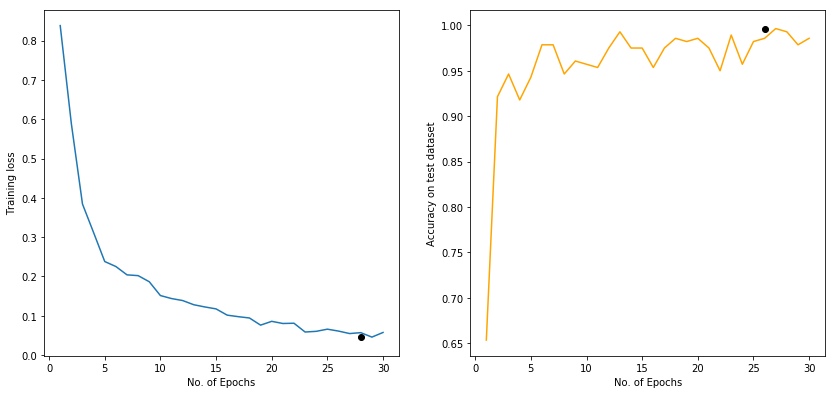

In [13]:
plt.figure(1,figsize=(14,14))
plt.subplot(221)
plt.xlabel('No. of Epochs')
plt.ylabel('Training loss')
plt.plot(list(range(1,31)),training_loss)
plt.scatter(training_loss.index(min(training_loss)),min(training_loss),color = 'black')
# plt.subplot(332)
# plt.xlabel('No. of Epochs')
# plt.ylabel('Testing loss')
# plt.plot(list(range(1,31)),testing_loss,color = 'green')
# plt.scatter(testing_loss.index(min(testing_loss)),min(testing_loss),color = 'black')
plt.subplot(222)
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy on test dataset')
plt.plot(list(range(1,31)),accuracy_list,color = 'orange')
plt.scatter(accuracy_list.index(max(accuracy_list)),max(accuracy_list),color = 'black')

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
model = torch.load('roateNet_2.pth')

/home/akansh/anaconda3/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/akansh/anaconda3/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/akansh/anaconda3/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing 

In [10]:
model = model.cuda()

In [11]:
classes = ['0', '180', '270', '90']
def predict(model, test_image_name):
     
    transform = test_transform
 
    test_image = Image.open(test_image_name)
#     plt.imshow(test_image)
     
    test_image_tensor = transform(test_image)
#     print(test_image_tensor.size())
 
    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
     
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        _ , b = (torch.max(out,1))
#         print(b)
#         print(train_data_loader.dataset.classes[b.item()])
        ps = torch.exp(out)
        topk, topclass = ps.topk(1, dim=1)
#     print(ps)
#     print(topk,topclass)
#     return classes[b.item()], topk.cpu().numpy()[0][0]
    return classes[b.item()]

In [29]:
a,_ = predict(model,'./Akash_54.jpg')

Text(0.5, 0, 'Predicted class 180')

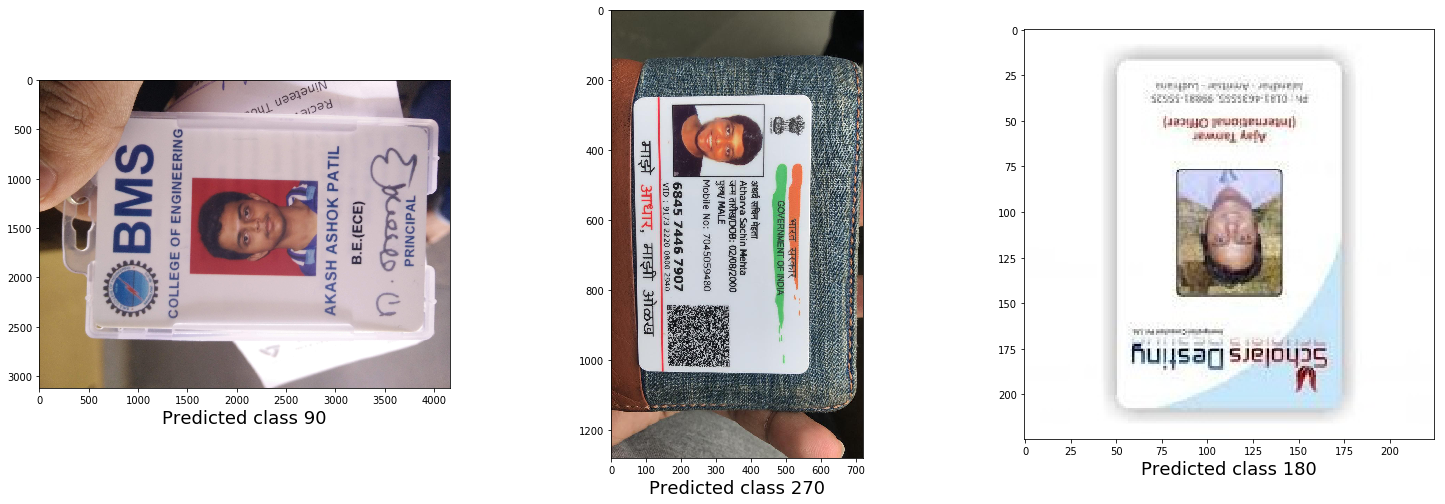

In [12]:
plt.figure(figsize=(25,28))
plt.subplot(3,3,1)
plt.imshow(Image.open('./Akash_54.jpg'))
plt.xlabel(f"Predicted class {predict(model,'./Akash_54.jpg')}",fontsize=18)
plt.subplot(3,3,2)
plt.imshow(Image.open('./Atharva_60.jpeg'))
plt.xlabel(f"Predicted class {predict(model,'./Atharva_60.jpeg')}",fontsize=18)
plt.subplot(3,3,3)
plt.imshow(Image.open('./image7 (2).jpeg_180.jpg'))
plt.xlabel(f"Predicted class {predict(model,'./image7 (2).jpeg_180.jpg')}",fontsize=18)

('0', 0.94622016)

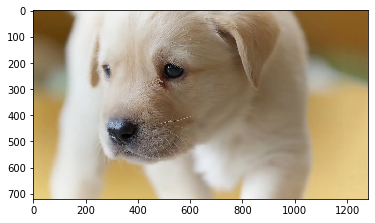

In [14]:
predict(model,'./maxresdefault.jpg')

('270', 0.99999905)

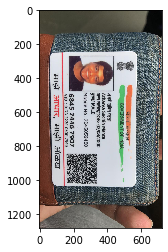

In [8]:
predict(model,'./Atharva_60.jpeg')

('90', 1.0)

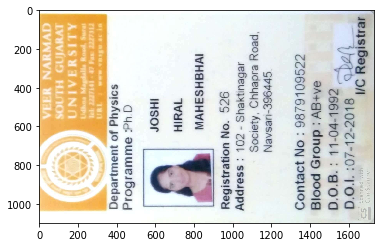

In [33]:
predict(model,'./Hiral_69.jpg_90.jpg')

In [8]:
predict(model,'./Madhav_15.jpg_270.jpg')

NameError: name 'plt' is not defined

('180', 1.0)

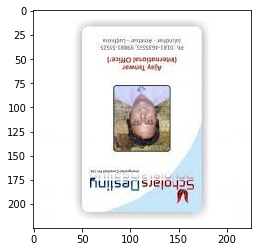

In [37]:
predict(model,'./image7 (2).jpeg_180.jpg')

#### Class Activation Mapping

In [10]:
from PIL import Image
from gradcam.utils import visualize_cam, Normalize
from gradcam import GradCAM, GradCAMpp

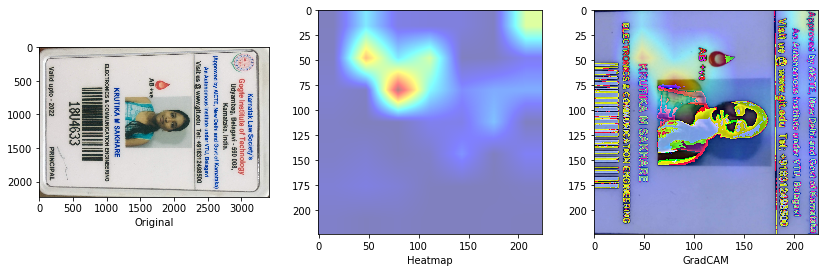

In [13]:
pil_img = Image.open("./Krutika_15.jpg_270.jpg")
normed_torch_img = test_transform(pil_img).unsqueeze(0).cuda()
resnet = model
resnet.eval()
resnet.cuda()
gradcam = GradCAMpp.from_config(model_type='resnet',
                              arch=resnet, layer_name='layer4')
mask, logit = gradcam(normed_torch_img, class_idx=1)
heatmap, cam_result = visualize_cam(mask, normed_torch_img)
a = transforms.ToPILImage()

heatmap, cam_result = visualize_cam(mask, normed_torch_img)

a = transforms.ToPILImage()

img1 = a(heatmap)
img2 = a(cam_result)
plt.figure(1,figsize=(14,14))
plt.subplot(331)
plt.xlabel('Original')
plt.imshow(pil_img)
plt.subplot(332)
plt.xlabel('Heatmap')
plt.imshow(img1,cmap='jet', alpha = 0.5)
plt.subplot(333)
plt.xlabel('GradCAM')
plt.imshow(img2,cmap='jet')

# print(predict(model,"./Madhav_15.jpg_270.jpg"))

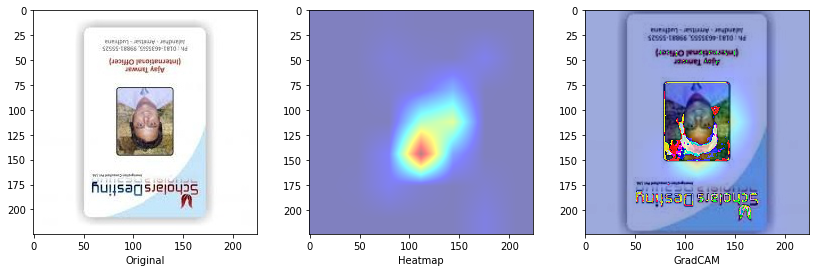

In [14]:
pil_img = Image.open("./image7 (2).jpeg_180.jpg")
normed_torch_img = test_transform(pil_img).unsqueeze(0).cuda()
resnet = model
resnet.eval()
resnet.cuda()
gradcam = GradCAMpp.from_config(model_type='resnet',
                              arch=resnet, layer_name='layer4')
mask, logit = gradcam(normed_torch_img, class_idx=1)
heatmap, cam_result = visualize_cam(mask, normed_torch_img)
a = transforms.ToPILImage()

heatmap, cam_result = visualize_cam(mask, normed_torch_img)

a = transforms.ToPILImage()

img1 = a(heatmap)
img2 = a(cam_result)
plt.figure(1,figsize=(14,14))
plt.subplot(331)
plt.xlabel('Original')
plt.imshow(pil_img)
plt.subplot(332)
plt.xlabel('Heatmap')
plt.imshow(img1,cmap='jet', alpha = 0.5)
plt.subplot(333)
plt.xlabel('GradCAM')
plt.imshow(img2,cmap='jet')

# print(predict(model,"./image7 (2).jpeg_180.jpg"))

C:\Users\Akansh Maurya\anaconda3\lib\site-packages\torch\nn\functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


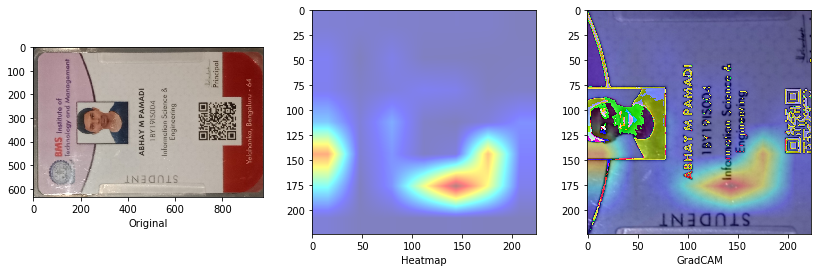

In [16]:
pil_img = Image.open("./Abhay_90.jpg_90.jpg")
normed_torch_img = test_transform(pil_img).unsqueeze(0).cuda()
resnet = model
resnet.eval()
resnet.cuda()
gradcam = GradCAMpp.from_config(model_type='resnet',
                              arch=resnet, layer_name='layer4')
mask, logit = gradcam(normed_torch_img, class_idx=1)
heatmap, cam_result = visualize_cam(mask, normed_torch_img)
a = transforms.ToPILImage()

heatmap, cam_result = visualize_cam(mask, normed_torch_img)

a = transforms.ToPILImage()

img1 = a(heatmap)
img2 = a(cam_result)
plt.figure(1,figsize=(14,14))
plt.subplot(331)
plt.xlabel('Original')
plt.imshow(pil_img)
plt.subplot(332)
plt.xlabel('Heatmap')
plt.imshow(img1,cmap='jet', alpha = 0.5)
plt.subplot(333)
plt.xlabel('GradCAM')
plt.imshow(img2,cmap='jet')

# print(predict(model,"./image7 (2).jpeg_180.jpg"))

In [11]:
import cv2

### Correcting Orientation 

In [12]:
from PIL import Image
from scipy import ndimage
def correct_orientation(model,image):
    classes = ['0', '180', '270', '90']
    model = torch.load(model)
    img = Image.open(image)
    plt.figure(1,figsize=(8,8))
    plt.subplot(221)
    plt.xlabel('Original image')
    plt.imshow(img)
    img_tensor = test_transform(img)
    if torch.cuda.is_available():
        img_tensor = img_tensor.view(1, 3, 224, 224).cuda()
    else:
        img_tensor = img_tensor.view(1, 3, 224, 224)
        
    with torch.no_grad():
        model.eval()
        out = model(img_tensor)
        _ , b = (torch.max(out,1))
        angle = int(classes[b.item()])
        rot_angle = 360-angle
        rotated = ndimage.rotate(img, rot_angle,mode = 'nearest')
        plt.subplot(222)
        plt.xlabel('Corrected image')
        plt.imshow(rotated)
        cv2.imwrite('./correct_orientation'+image,cv2.cvtColor(rotated, cv2.COLOR_RGB2BGR))
        

        
        


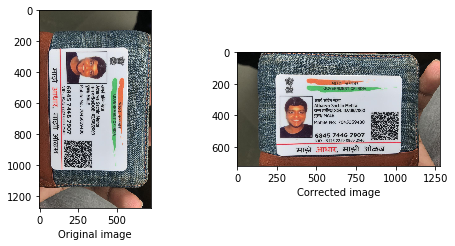

In [13]:
correct_orientation('roateNet_2.pth','./Atharva_60.jpeg')

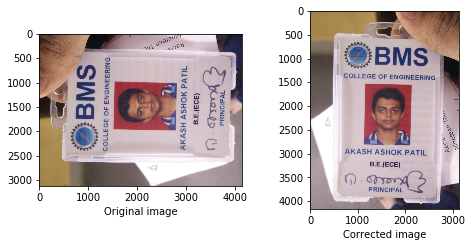

In [14]:
correct_orientation('roateNet_2.pth','./Akash_54.jpg')

<Figure size 864x864 with 0 Axes>

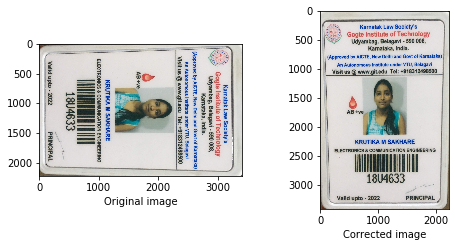

In [21]:
plt.figure(2,(12,12))
# plt.subplot(331)
correct_orientation("roateNet_2.pth",'./Krutika_15.jpg_270.jpg')
# # # plt.subplot(332
# correct_orientation("roateNet_2.pth",'./Krutika_15.jpg_270.jpg'))

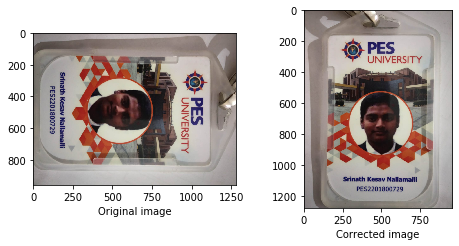

In [14]:
correct_orientation('roateNet_2.pth','./Srinath_89.jpeg')

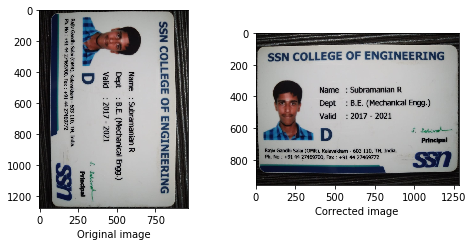

In [15]:
correct_orientation('roateNet_2.pth','./Subramanian_4.jpg')